In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams["figure.figsize"]=(20,8)
sns.set_style("dark")

## `Data Preprocessing`

In [3]:
# Importing and show the data set
df = pd.read_csv("/kaggle/input/aura-sleep-monitoring-using-genai/acquiredDataset (3).csv")
df.head()

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0

In [4]:
df.describe()

attention   meditation         delta         theta       lowAlpha  \
count  3735.000000  3735.000000  3.735000e+03  3.735000e+03    3735.000000   
mean     48.214726    56.577510  5.187714e+05  1.362420e+05   33413.343775   
std      21.876949    19.066577  5.997837e+05  2.175501e+05   51970.930842   
min       1.000000     1.000000  2.160000e+02  1.380000e+02      32.000000   
25%      35.000000    43.000000  7.199650e+04  2.347200e+04    7402.000000   
50%      48.000000    56.000000  2.773820e+05  5.797200e+04   16481.000000   
75%      63.000000    69.000000  7.780680e+05  1.514855e+05   37721.500000   
max     100.000000   100.000000  3.598743e+06  3.194358e+06  699008.000000   

           highAlpha        lowBeta       highBeta       lowGamma  \
count    3735.000000    3735.000000    3735.000000    3735.000000   
mean    30580.759036   25640.069076   23276.979384    8117.130388   
std     52681.858764   37159.039642   43921.116122   15522.904383   
min         9.000000       2.000000       3.000000       6.000000   
25%      6908.500000    6240.000000    4862.000000    2247.000000   
50%     14928.000000   13841.000000    9739.000000    4440.000000   
75%     33147.500000   30236.000000   20796.500000    8813.000000   
max    785947.000000  595549.000000  443589.000000  289281.000000   

          highGamma  classification  
count  3.735000e+03      3735.00000  
mean   2.087258e+05         0.42838  
std    3.297073e+05         0.49491  
min    4.700000e+01         0.00000  
25%    5.683000e+03         0.00000  
50%    5.719800e+04         0.00000  
75%    2.576875e+05         1.00000  
max    2.328370e+06         1.00000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [6]:
# Checking For missing Values
df.isna().sum()

attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64

In [7]:
# checking For Null values
df.isnull().sum()

attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64

## `Histgram of the Data Set`

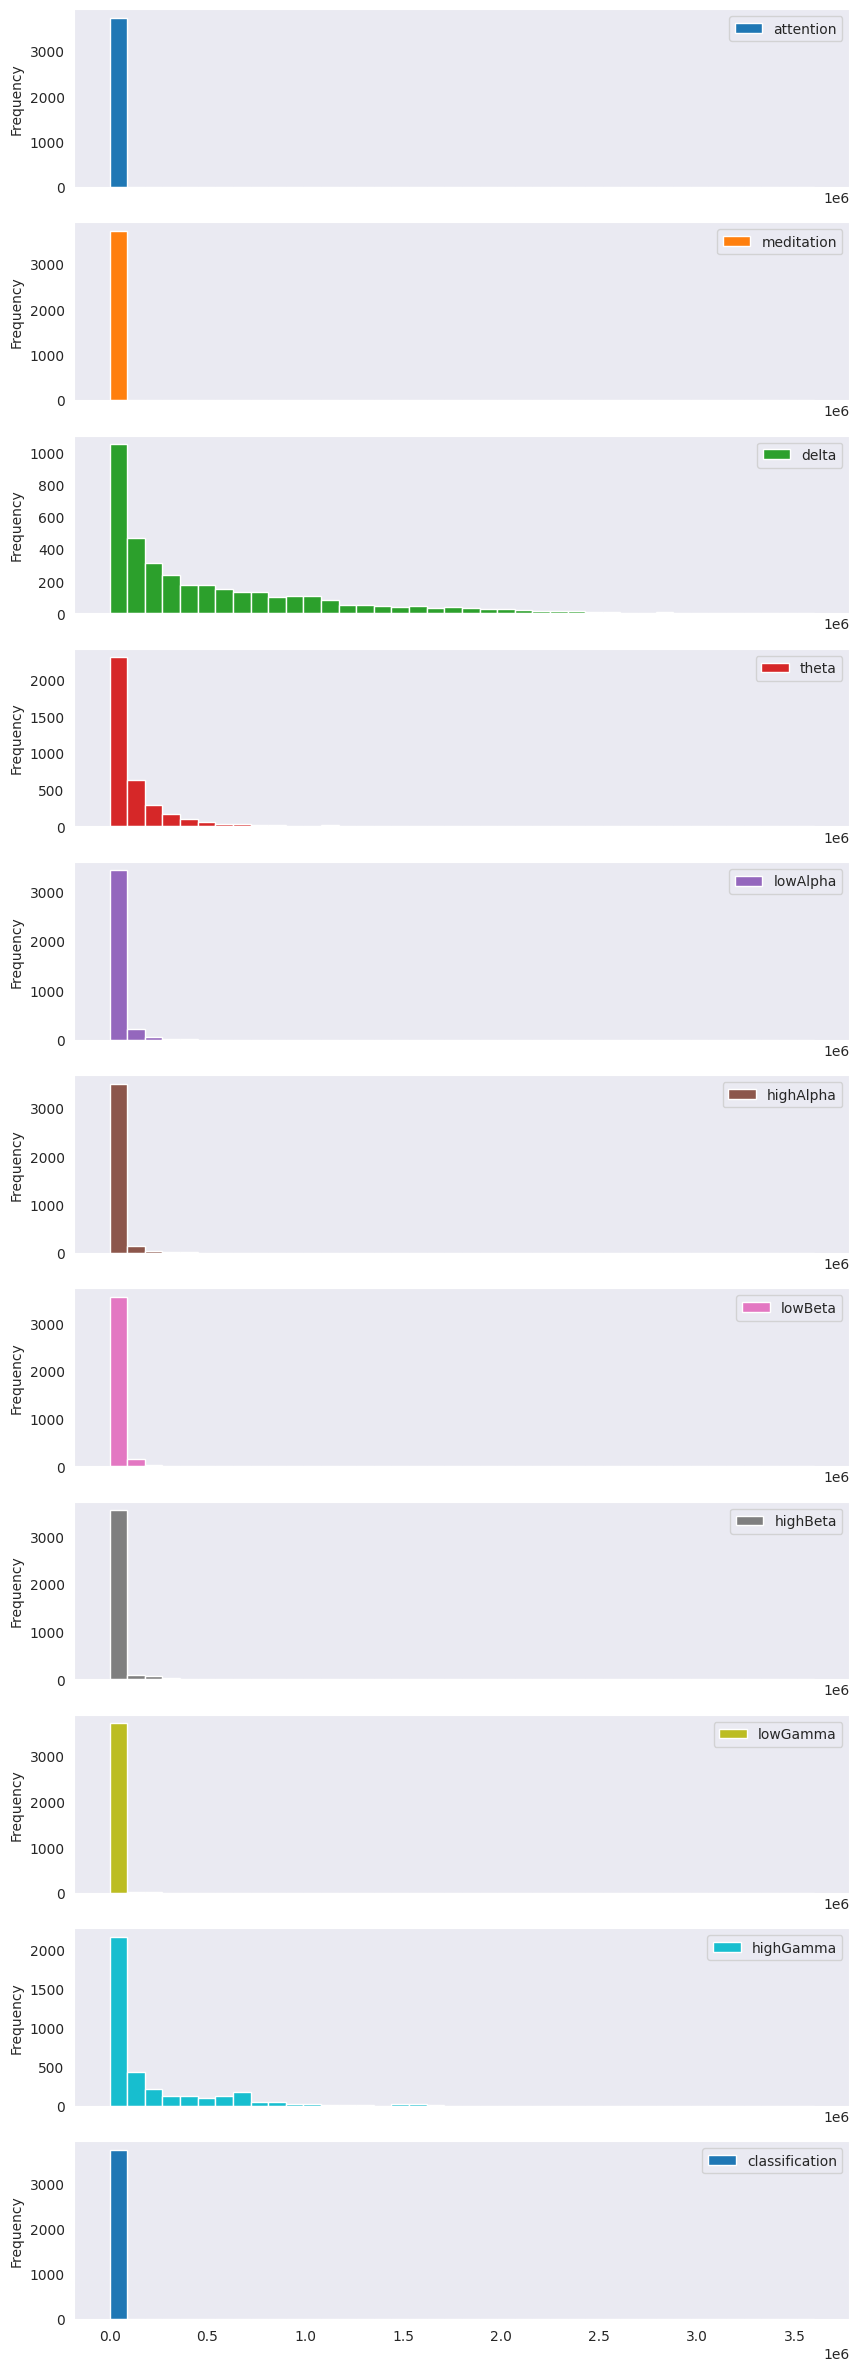

In [8]:
df.plot.hist(subplots=True, figsize=(10,30), bins =40);
plt.grid(False)
plt.legend()

In [9]:
df.columns

Index(['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha',
       'lowBeta', 'highBeta', 'lowGamma', 'highGamma', 'classification'],
      dtype='object')

In [10]:
State = df['classification'].value_counts()
State

classification
0    2135
1    1600
Name: count, dtype: int64

In [11]:
State.values

array([2135, 1600])

In [12]:
State.keys()

Index([0, 1], dtype='int64', name='classification')

## `Pie Chart of The Data Set`

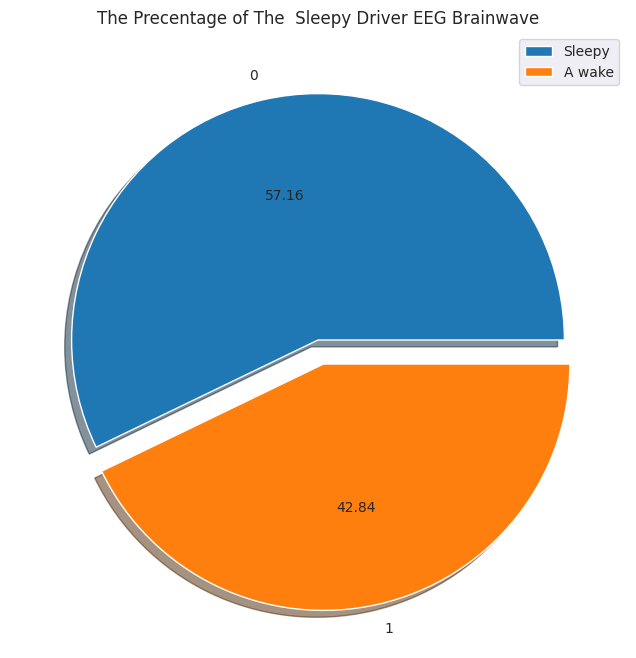

In [13]:
plt.pie(State.values ,
       labels=State.keys(),
       explode=[0,0.1]
       ,shadow=True
       ,autopct="%.2F" ,
       center=(0,0))
plt.title("The Precentage of The  Sleepy Driver EEG Brainwave")
plt.legend(labels=["Sleepy","A wake"])
plt.show()

## `Heat Map of The Data Set`

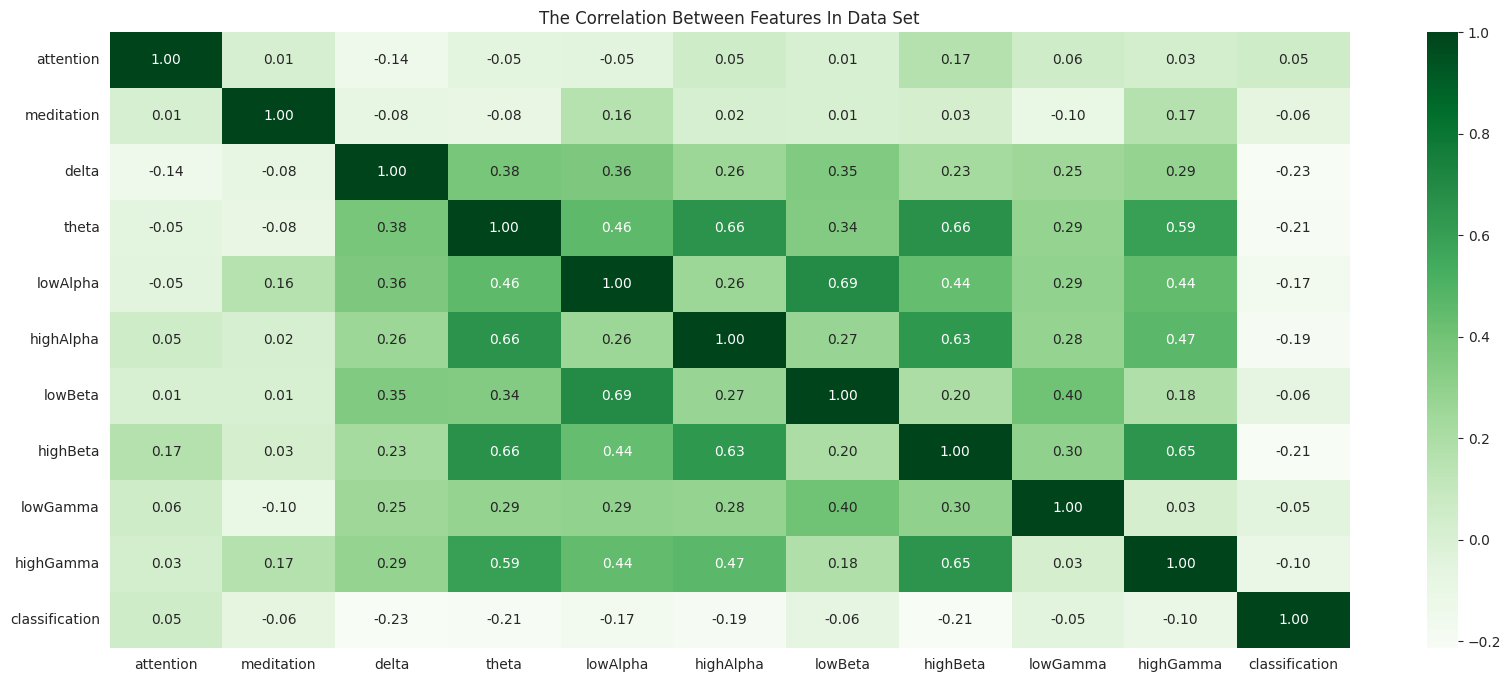

In [14]:
plt.title("The Correlation Between Features In Data Set");
sns.heatmap(df.corr(),
            annot=True ,
            linewidths=0 ,
            linecolor="black",
            cmap="Greens",
            robust=True,
           fmt='.2F')
plt.show()

## `Line Chart For The Data Set`

In [15]:
line_features = [ 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha',
       'lowBeta', 'highBeta', 'lowGamma', 'highGamma', 'classification']

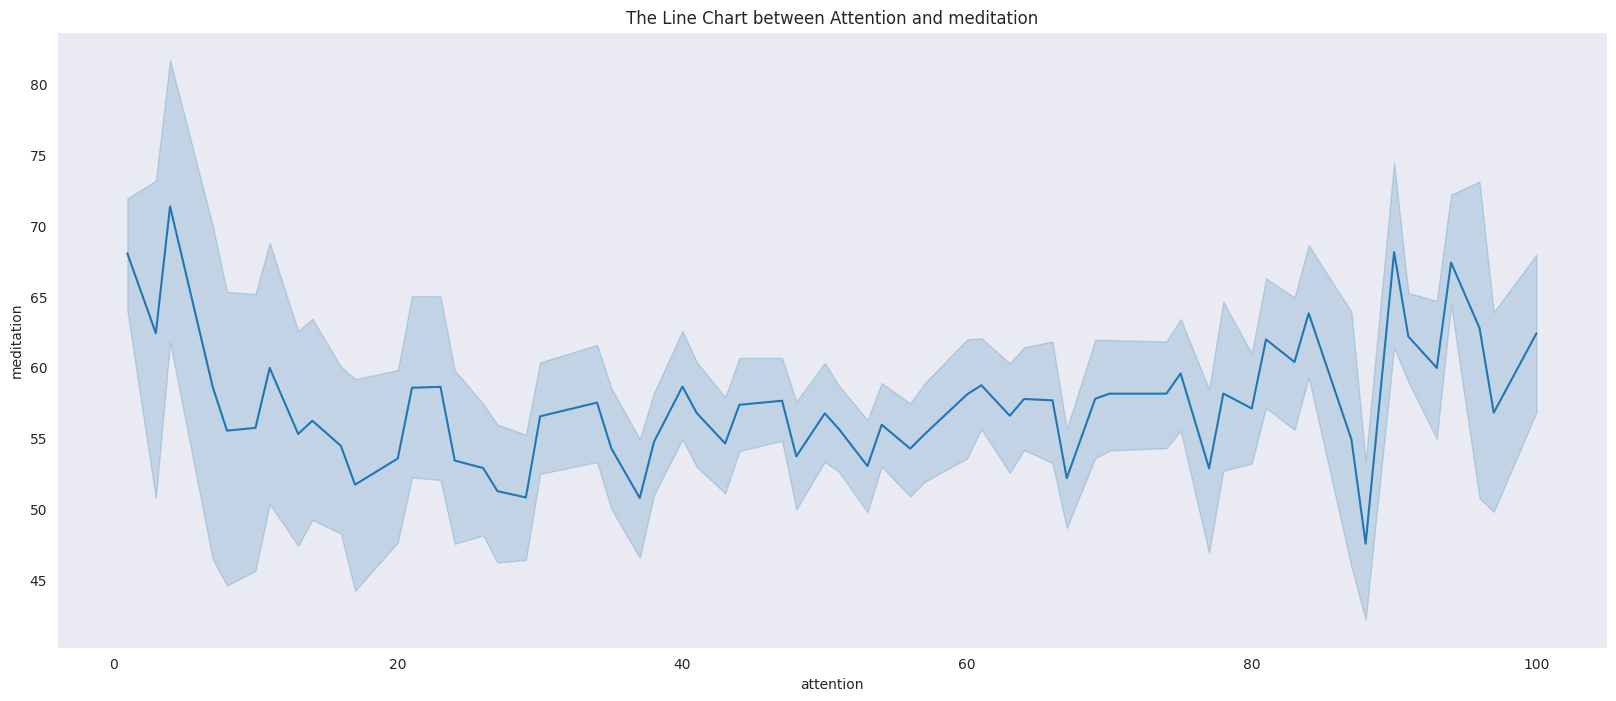

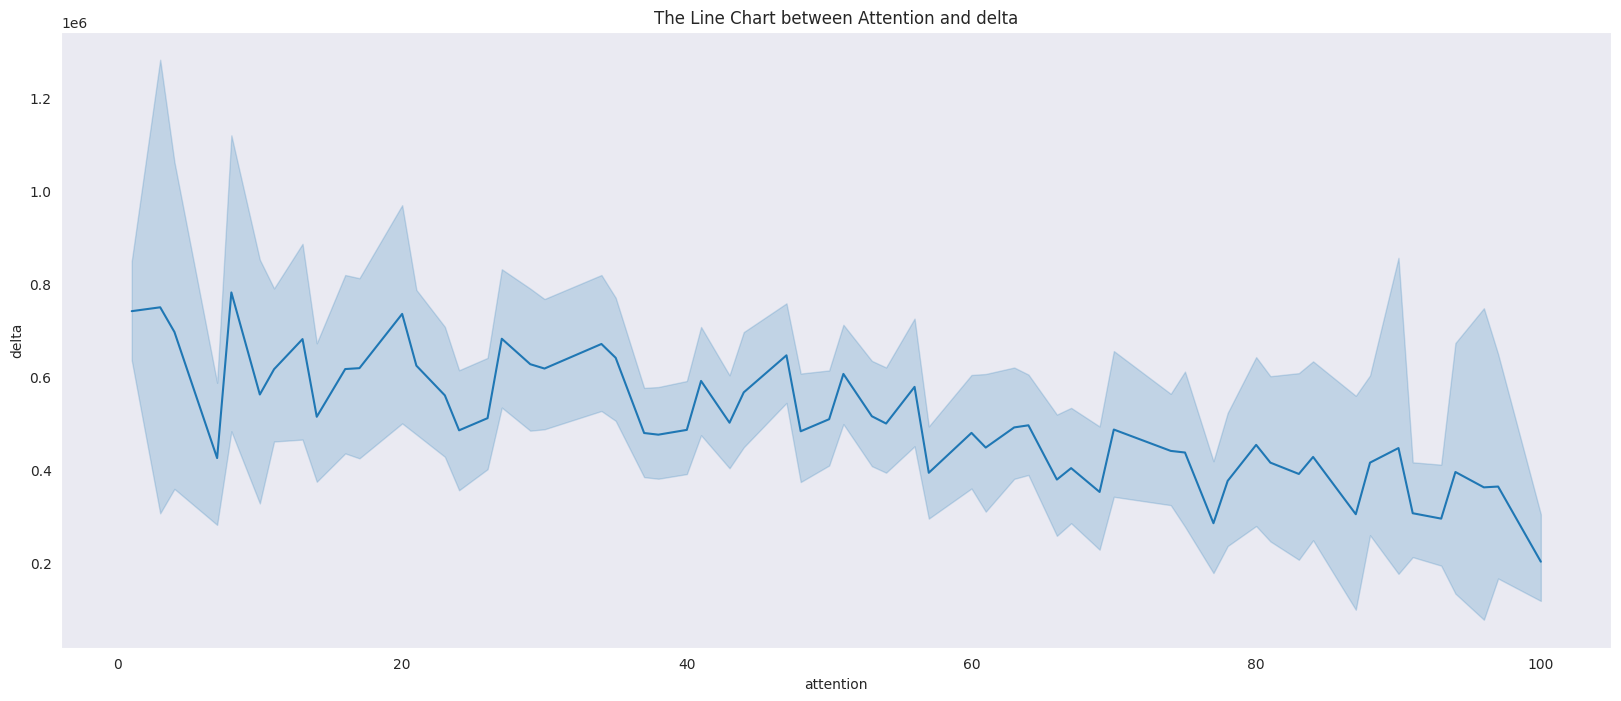

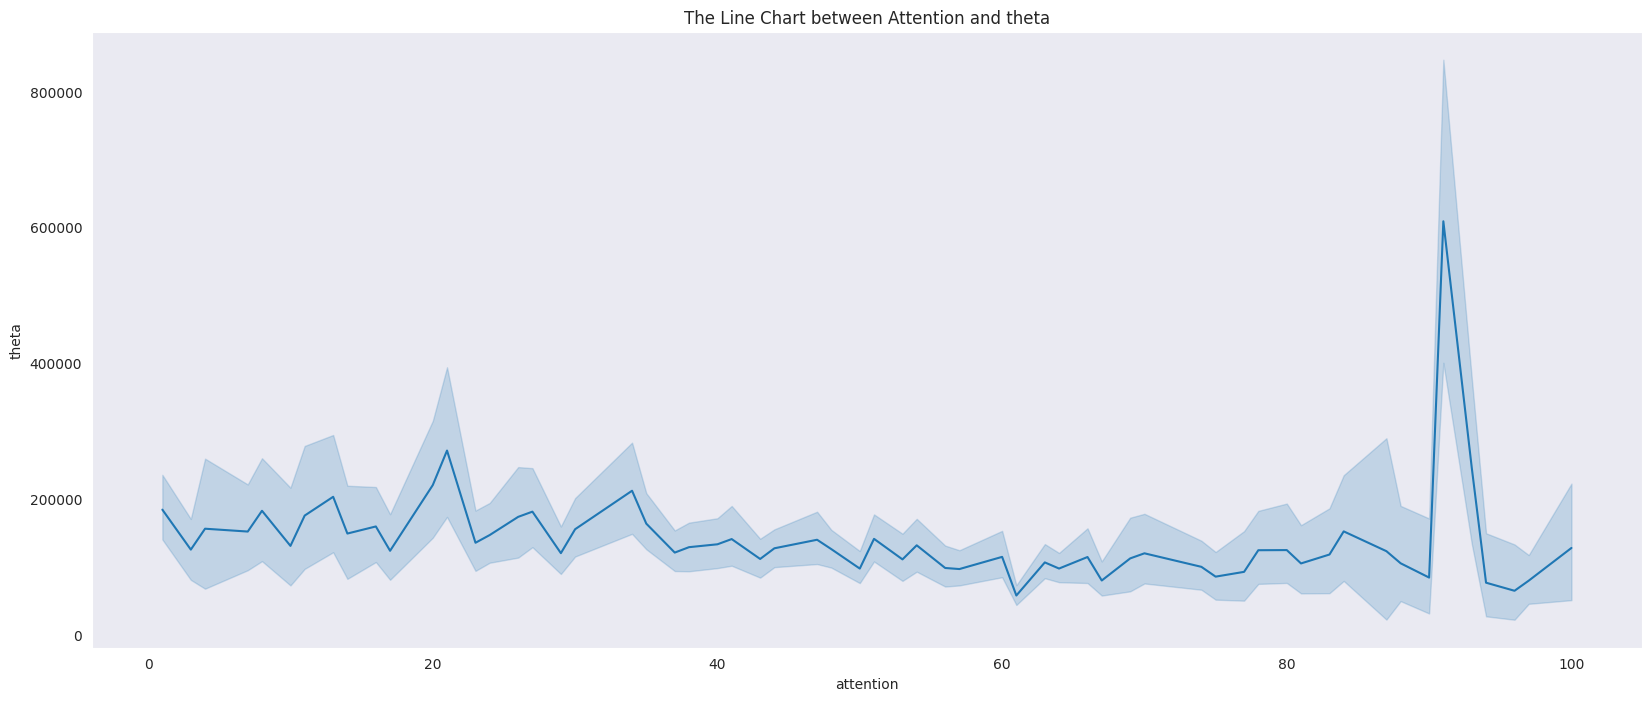

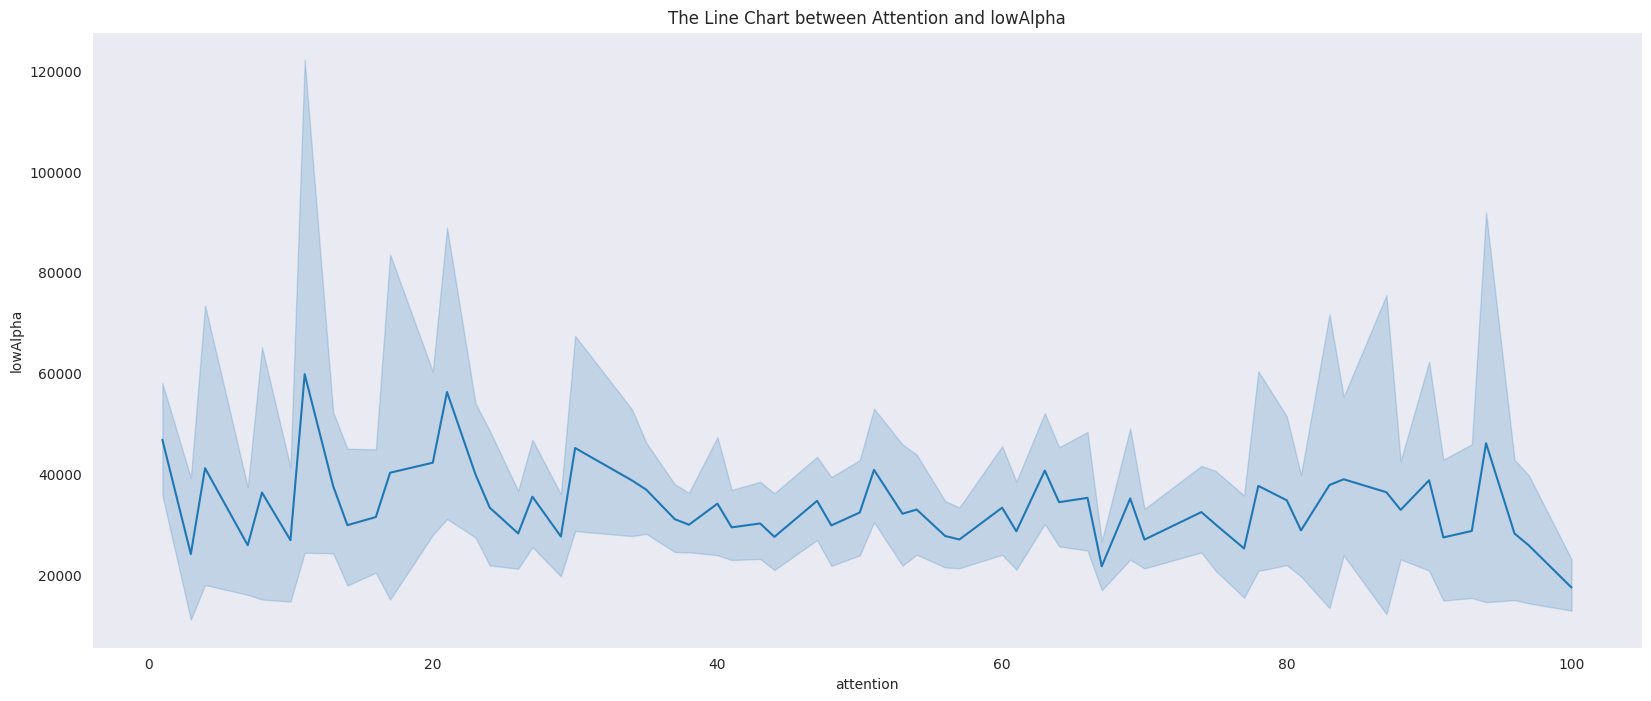

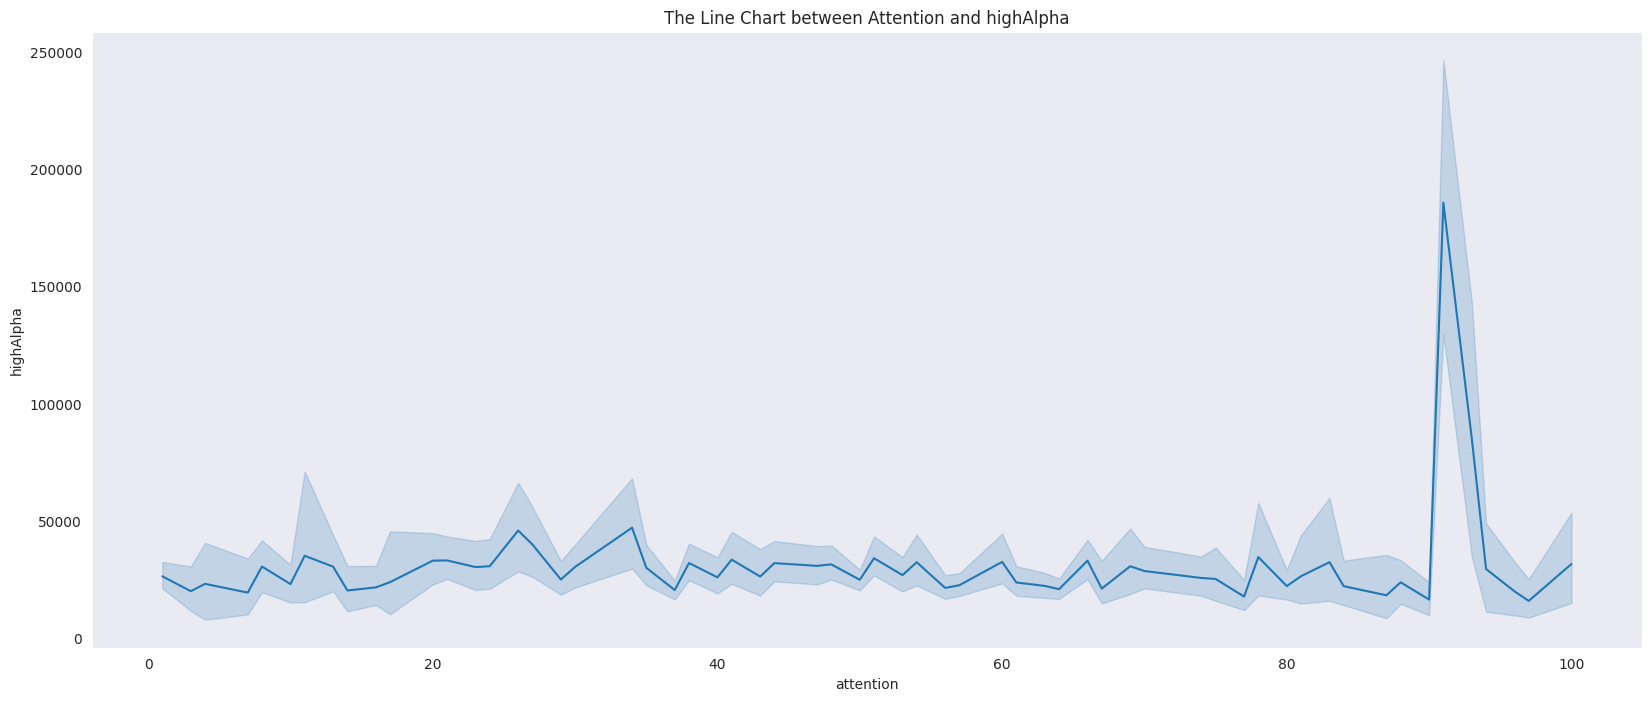

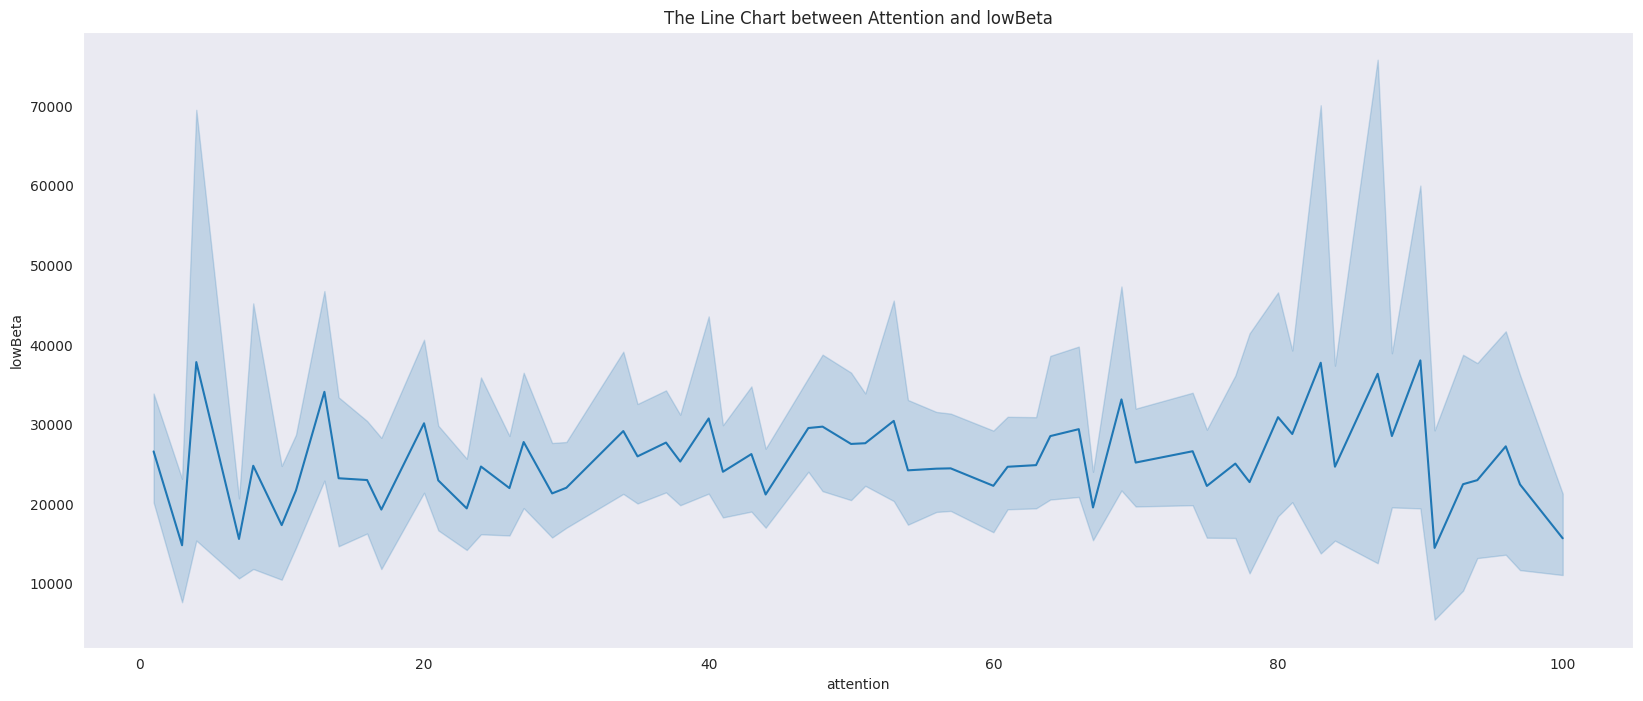

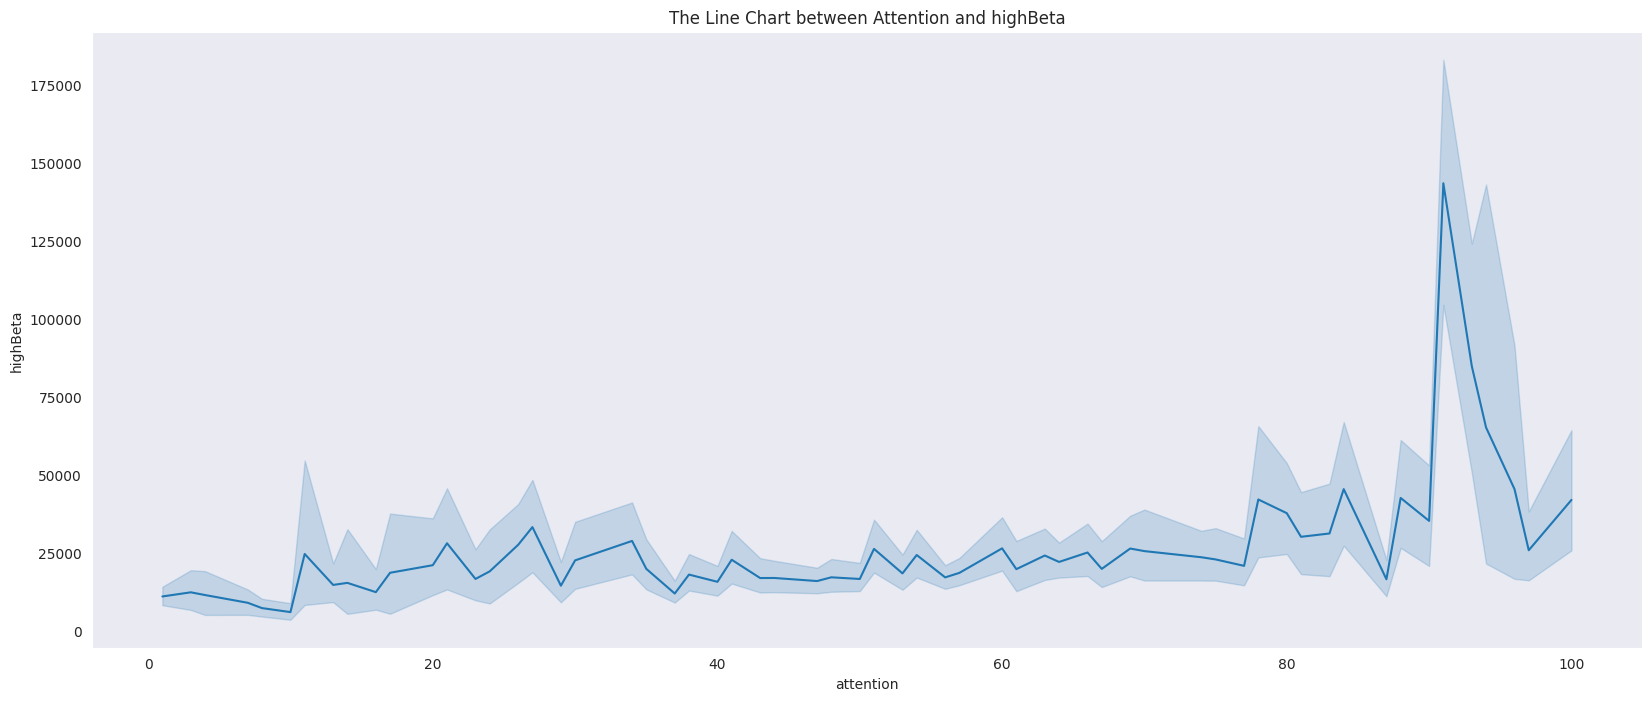

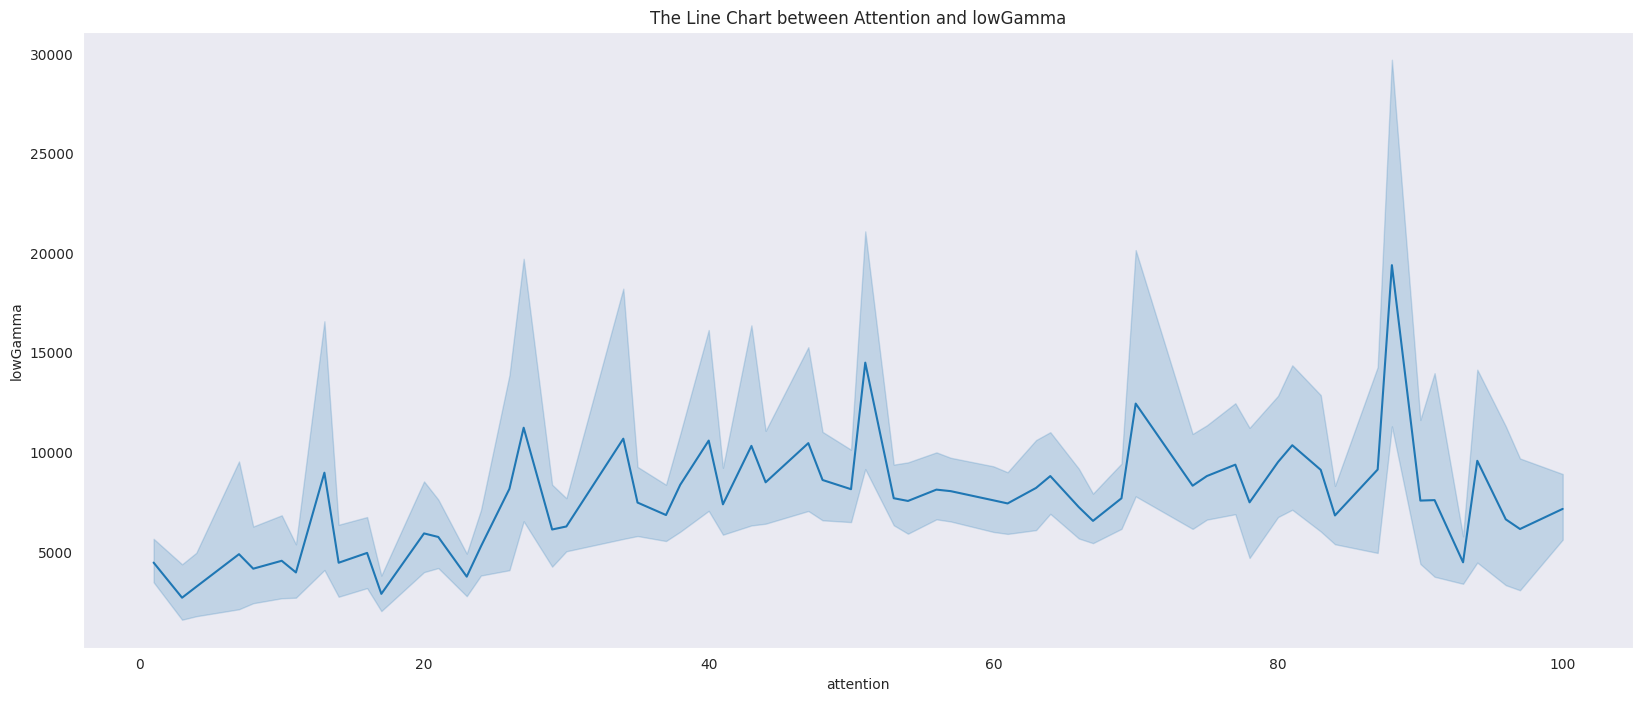

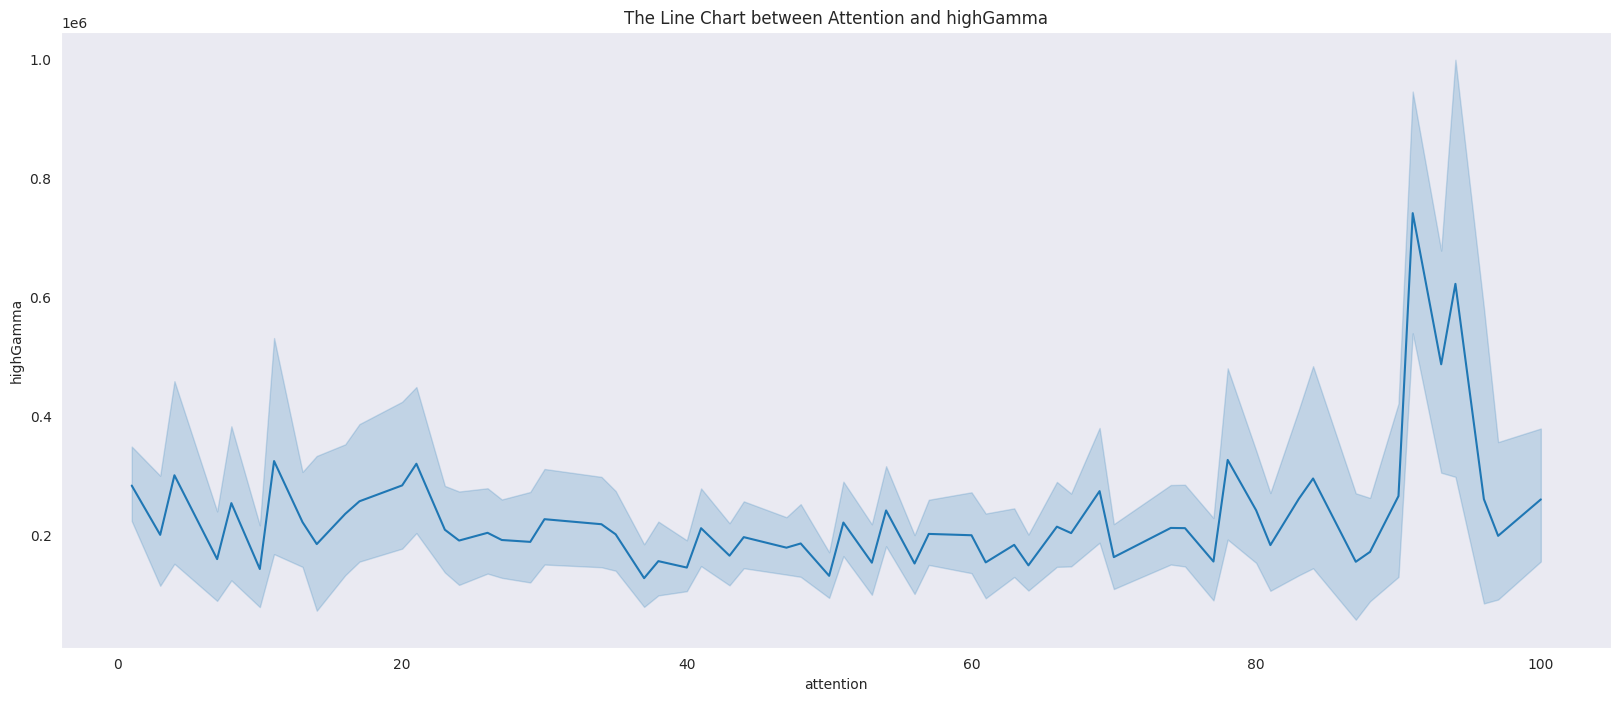

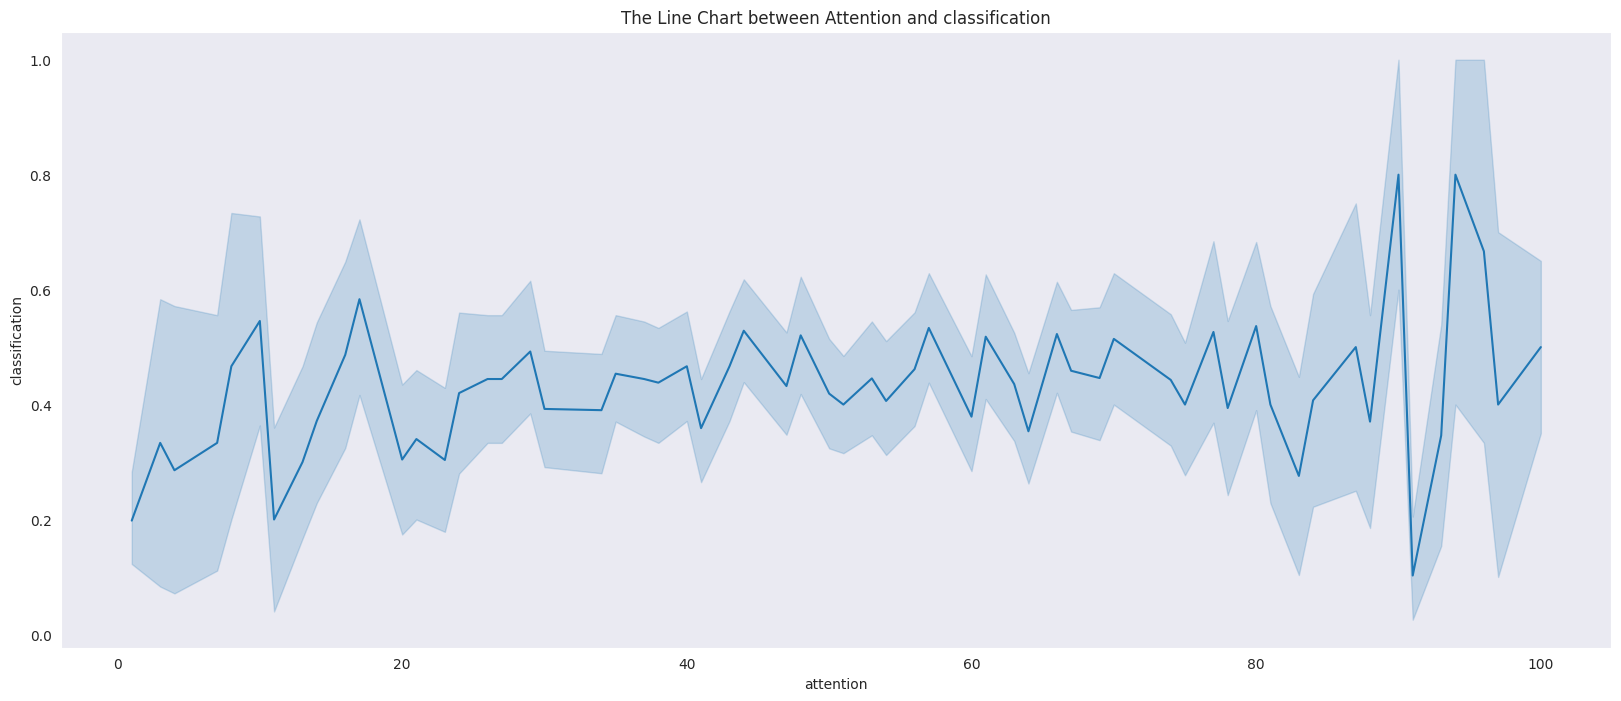

In [16]:
for i in line_features:
    plt.title(f"The Line Chart between Attention and {i}")
    sns.lineplot(x=df["attention"], y=df[i])
    plt.show()

## `Plot To Discover The Value Of The Classificatiion Verse The Attention` 

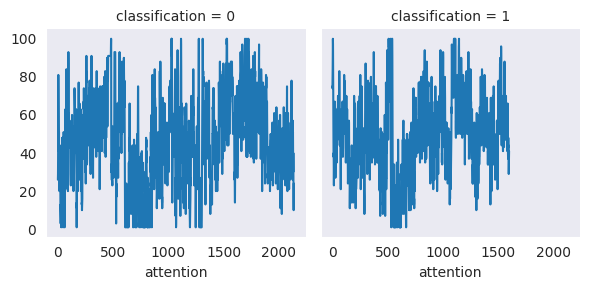

In [17]:
plot = sns.FacetGrid(data=df , col='classification')
plot.map(plt.plot , 'attention')
plt.show();

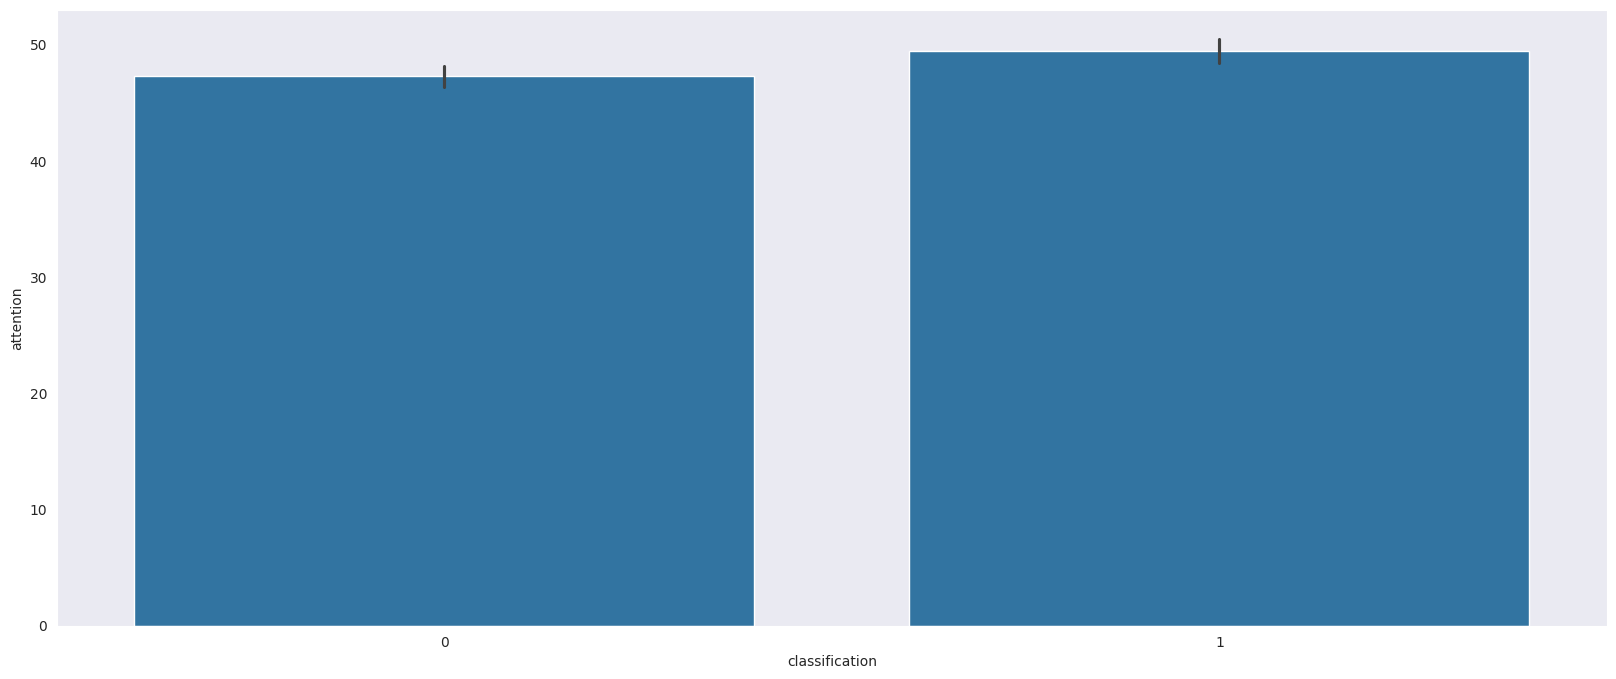

In [18]:
sns.barplot(x='classification' , y='attention' , data = df)
rcParams["figure.figsize"]=(10,8)

## `Box Plot To Discover The Outliers In The Data`

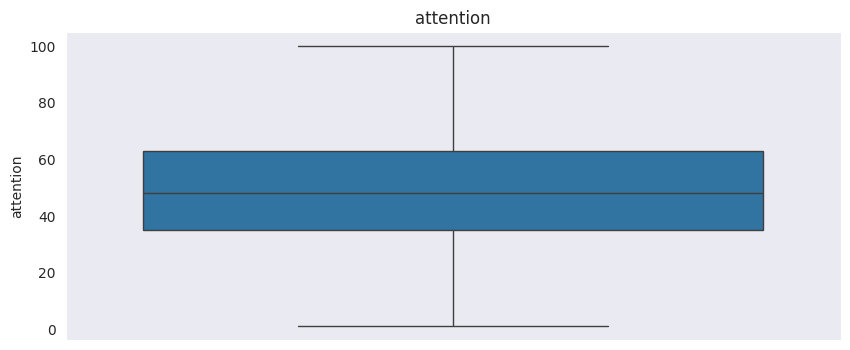

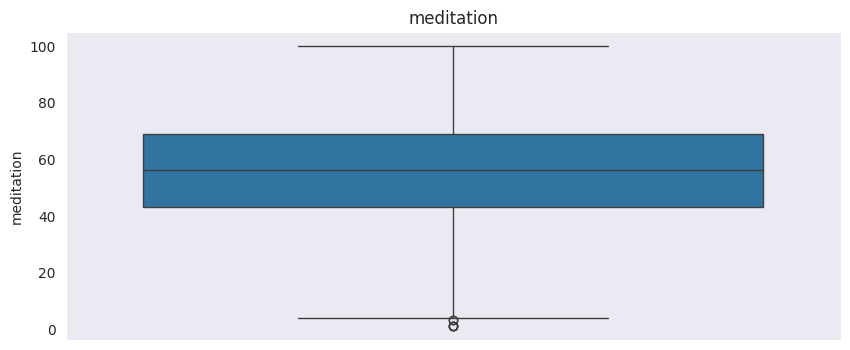

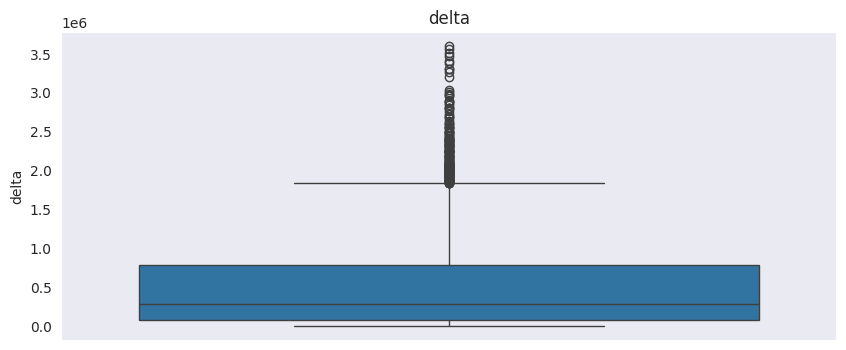

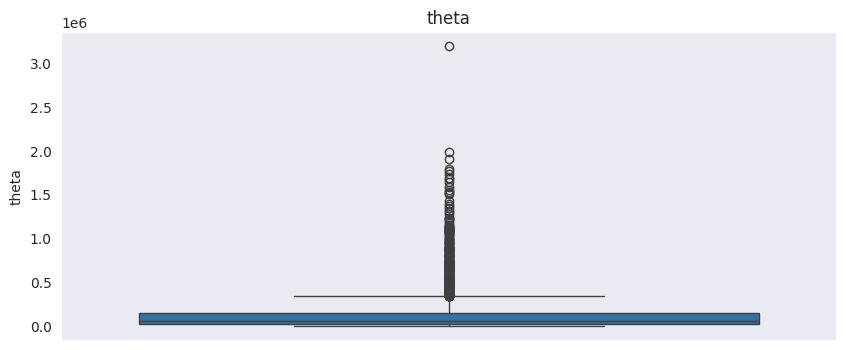

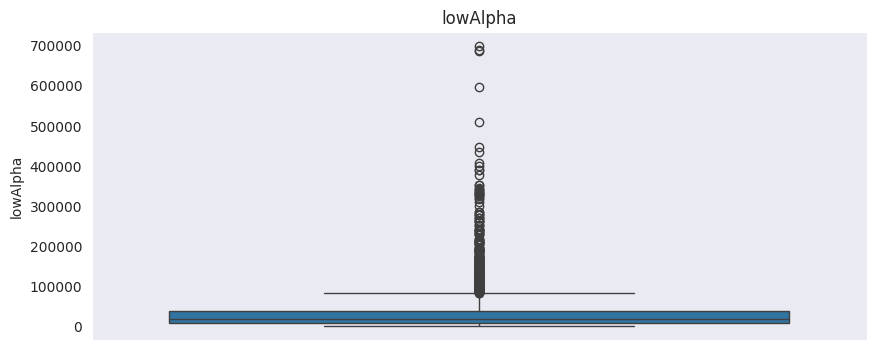

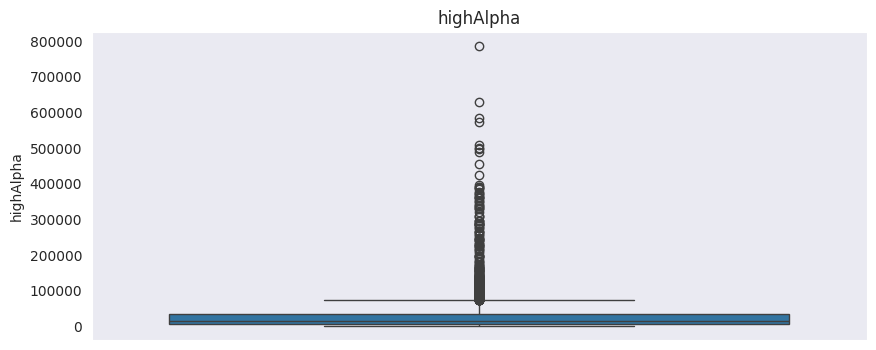

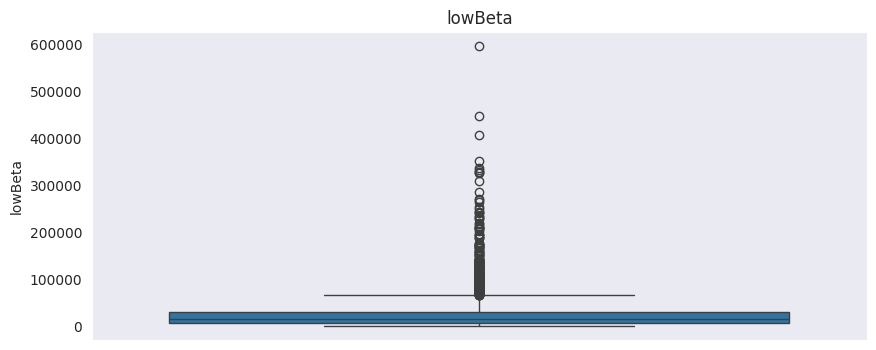

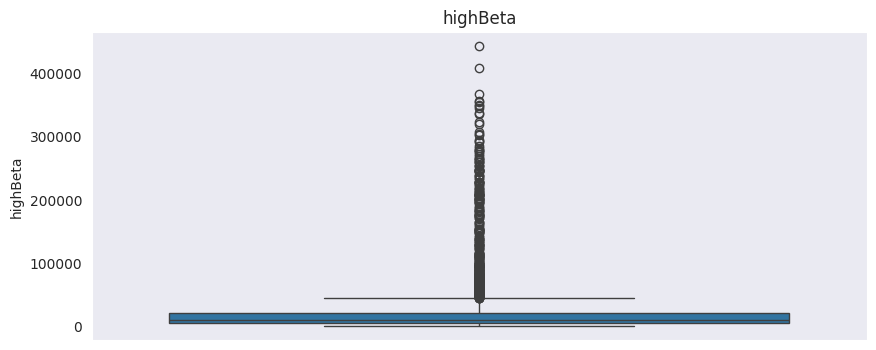

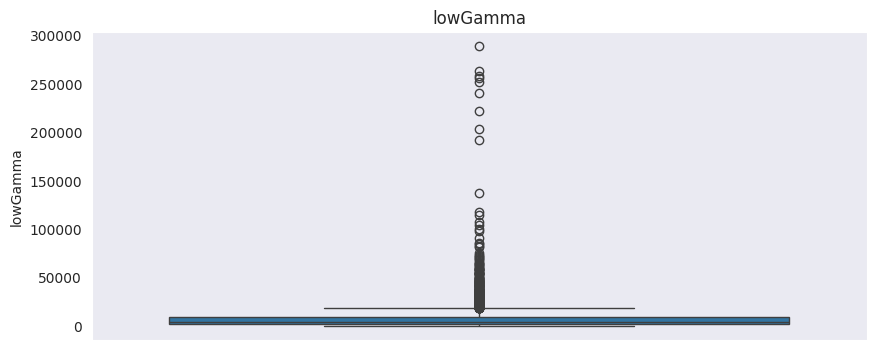

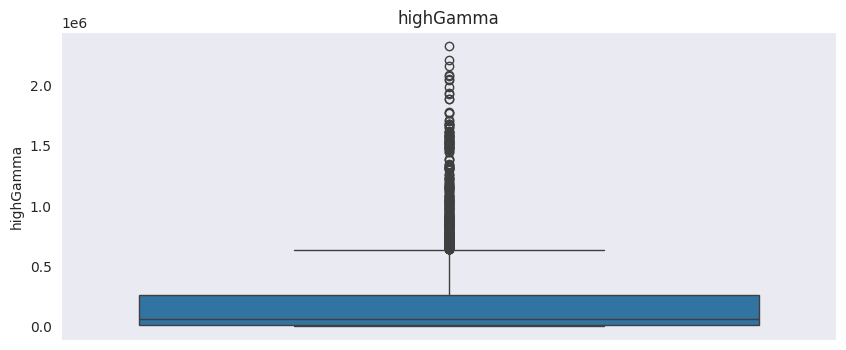

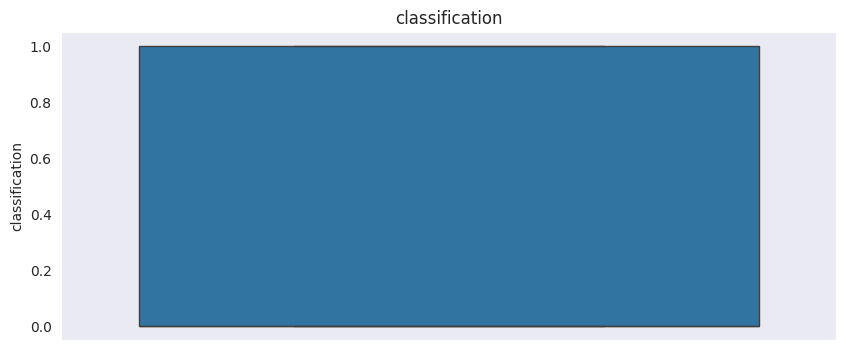

In [19]:
#Box Plots
for i in df.columns:
    plt.figure(figsize=(10, 4)) 
    plt.title(i)
    sns.boxplot(df[i])
    plt.show() 

## `Violin Plot For The Data Set`

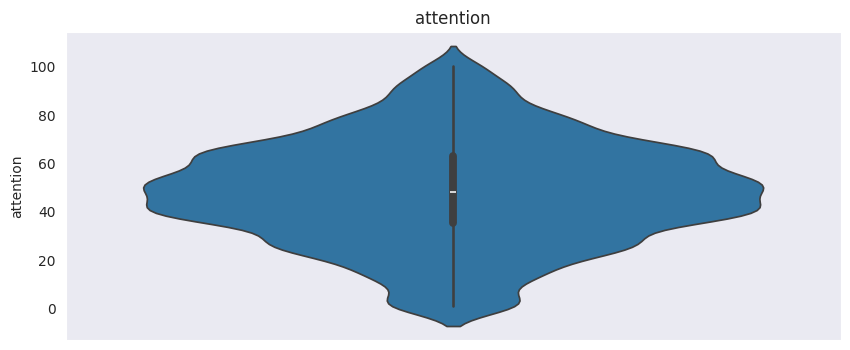

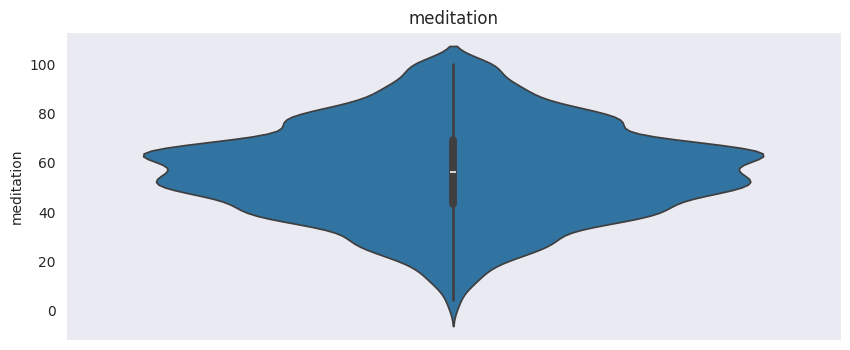

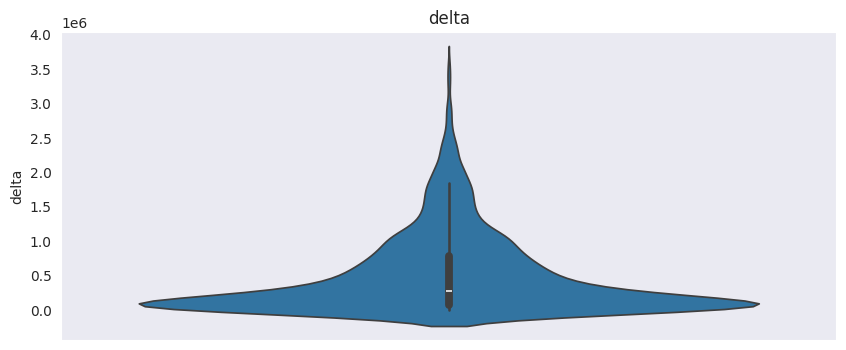

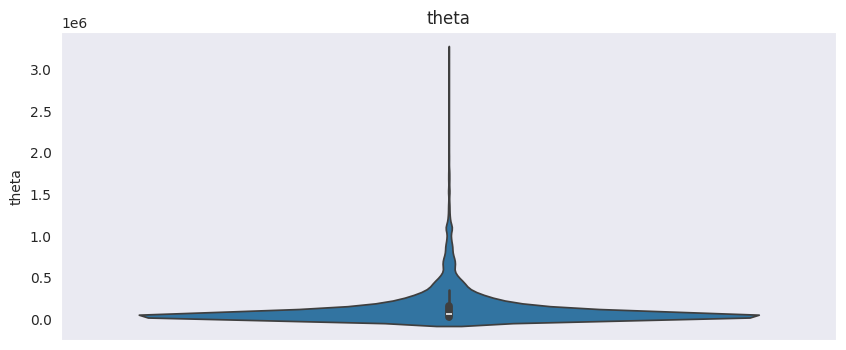

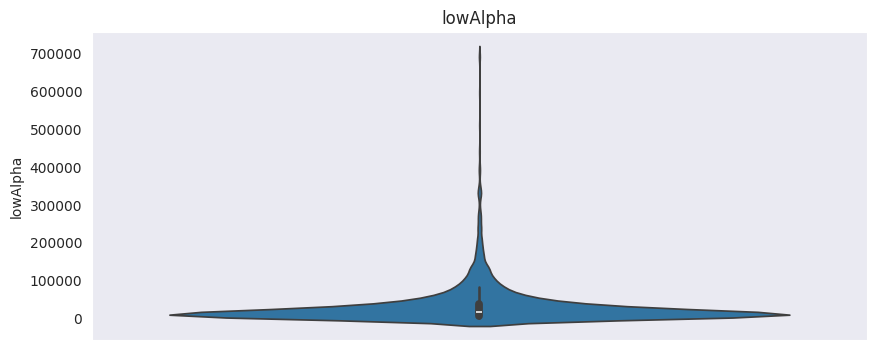

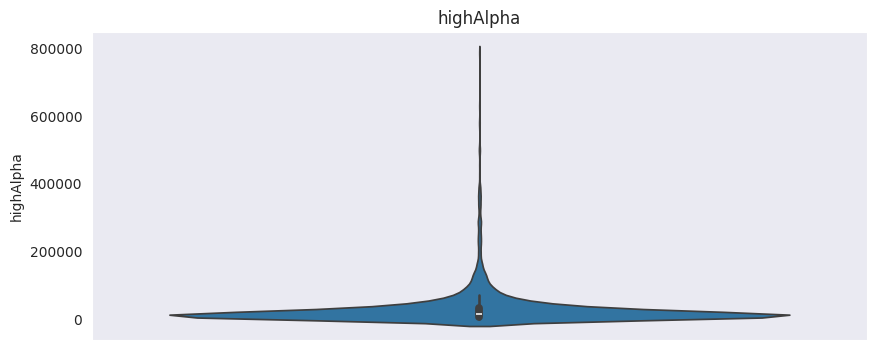

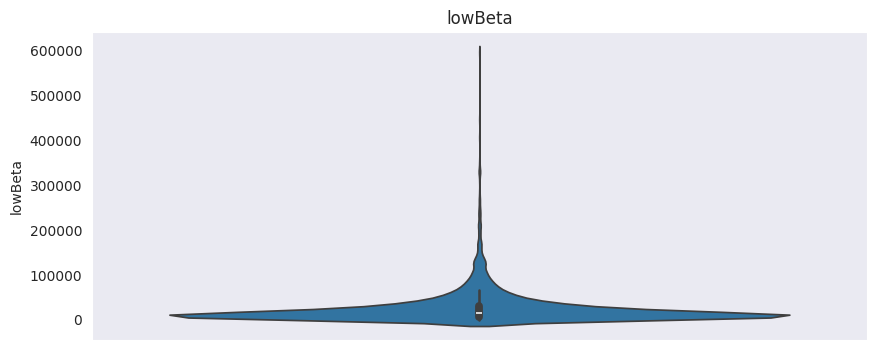

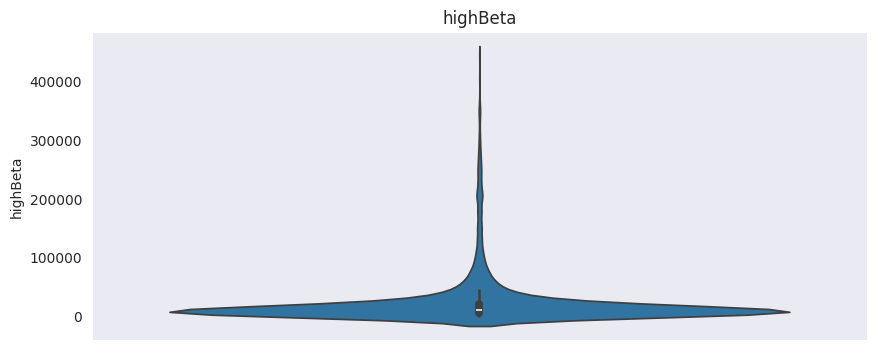

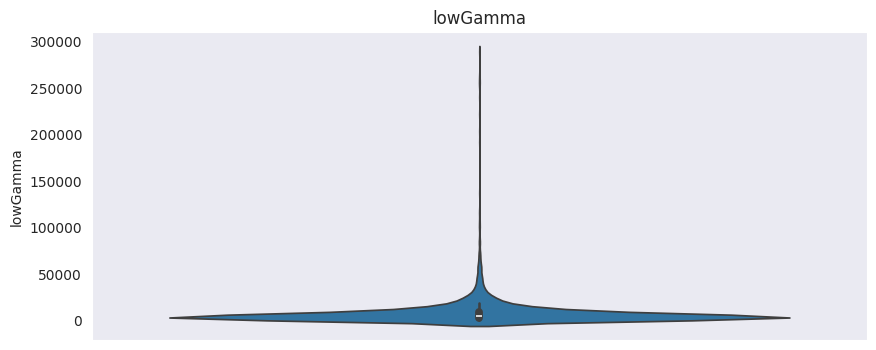

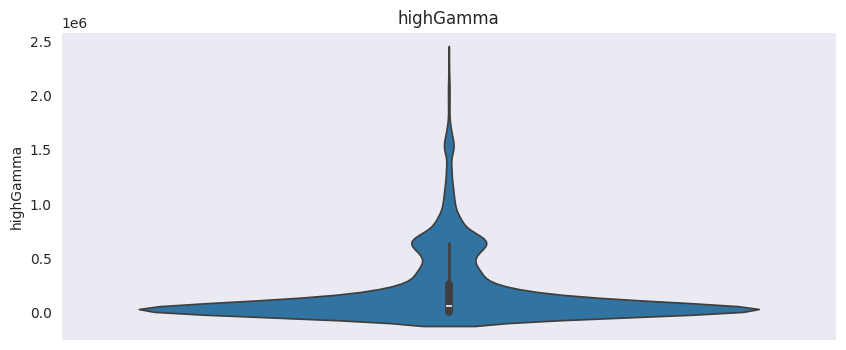

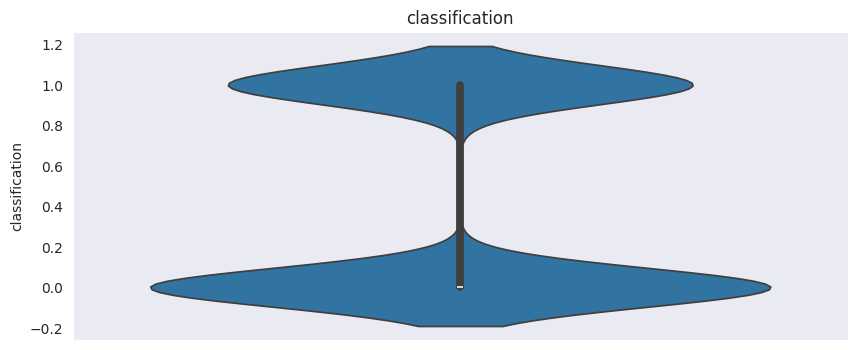

In [20]:
#violin Plots
for i in df.columns:
    plt.figure(figsize=(10, 4)) 
    plt.title(i)
    sns.violinplot(df[i])
    plt.show() 

## `Pair Plot To Discover the Distribution Of The Data Set`

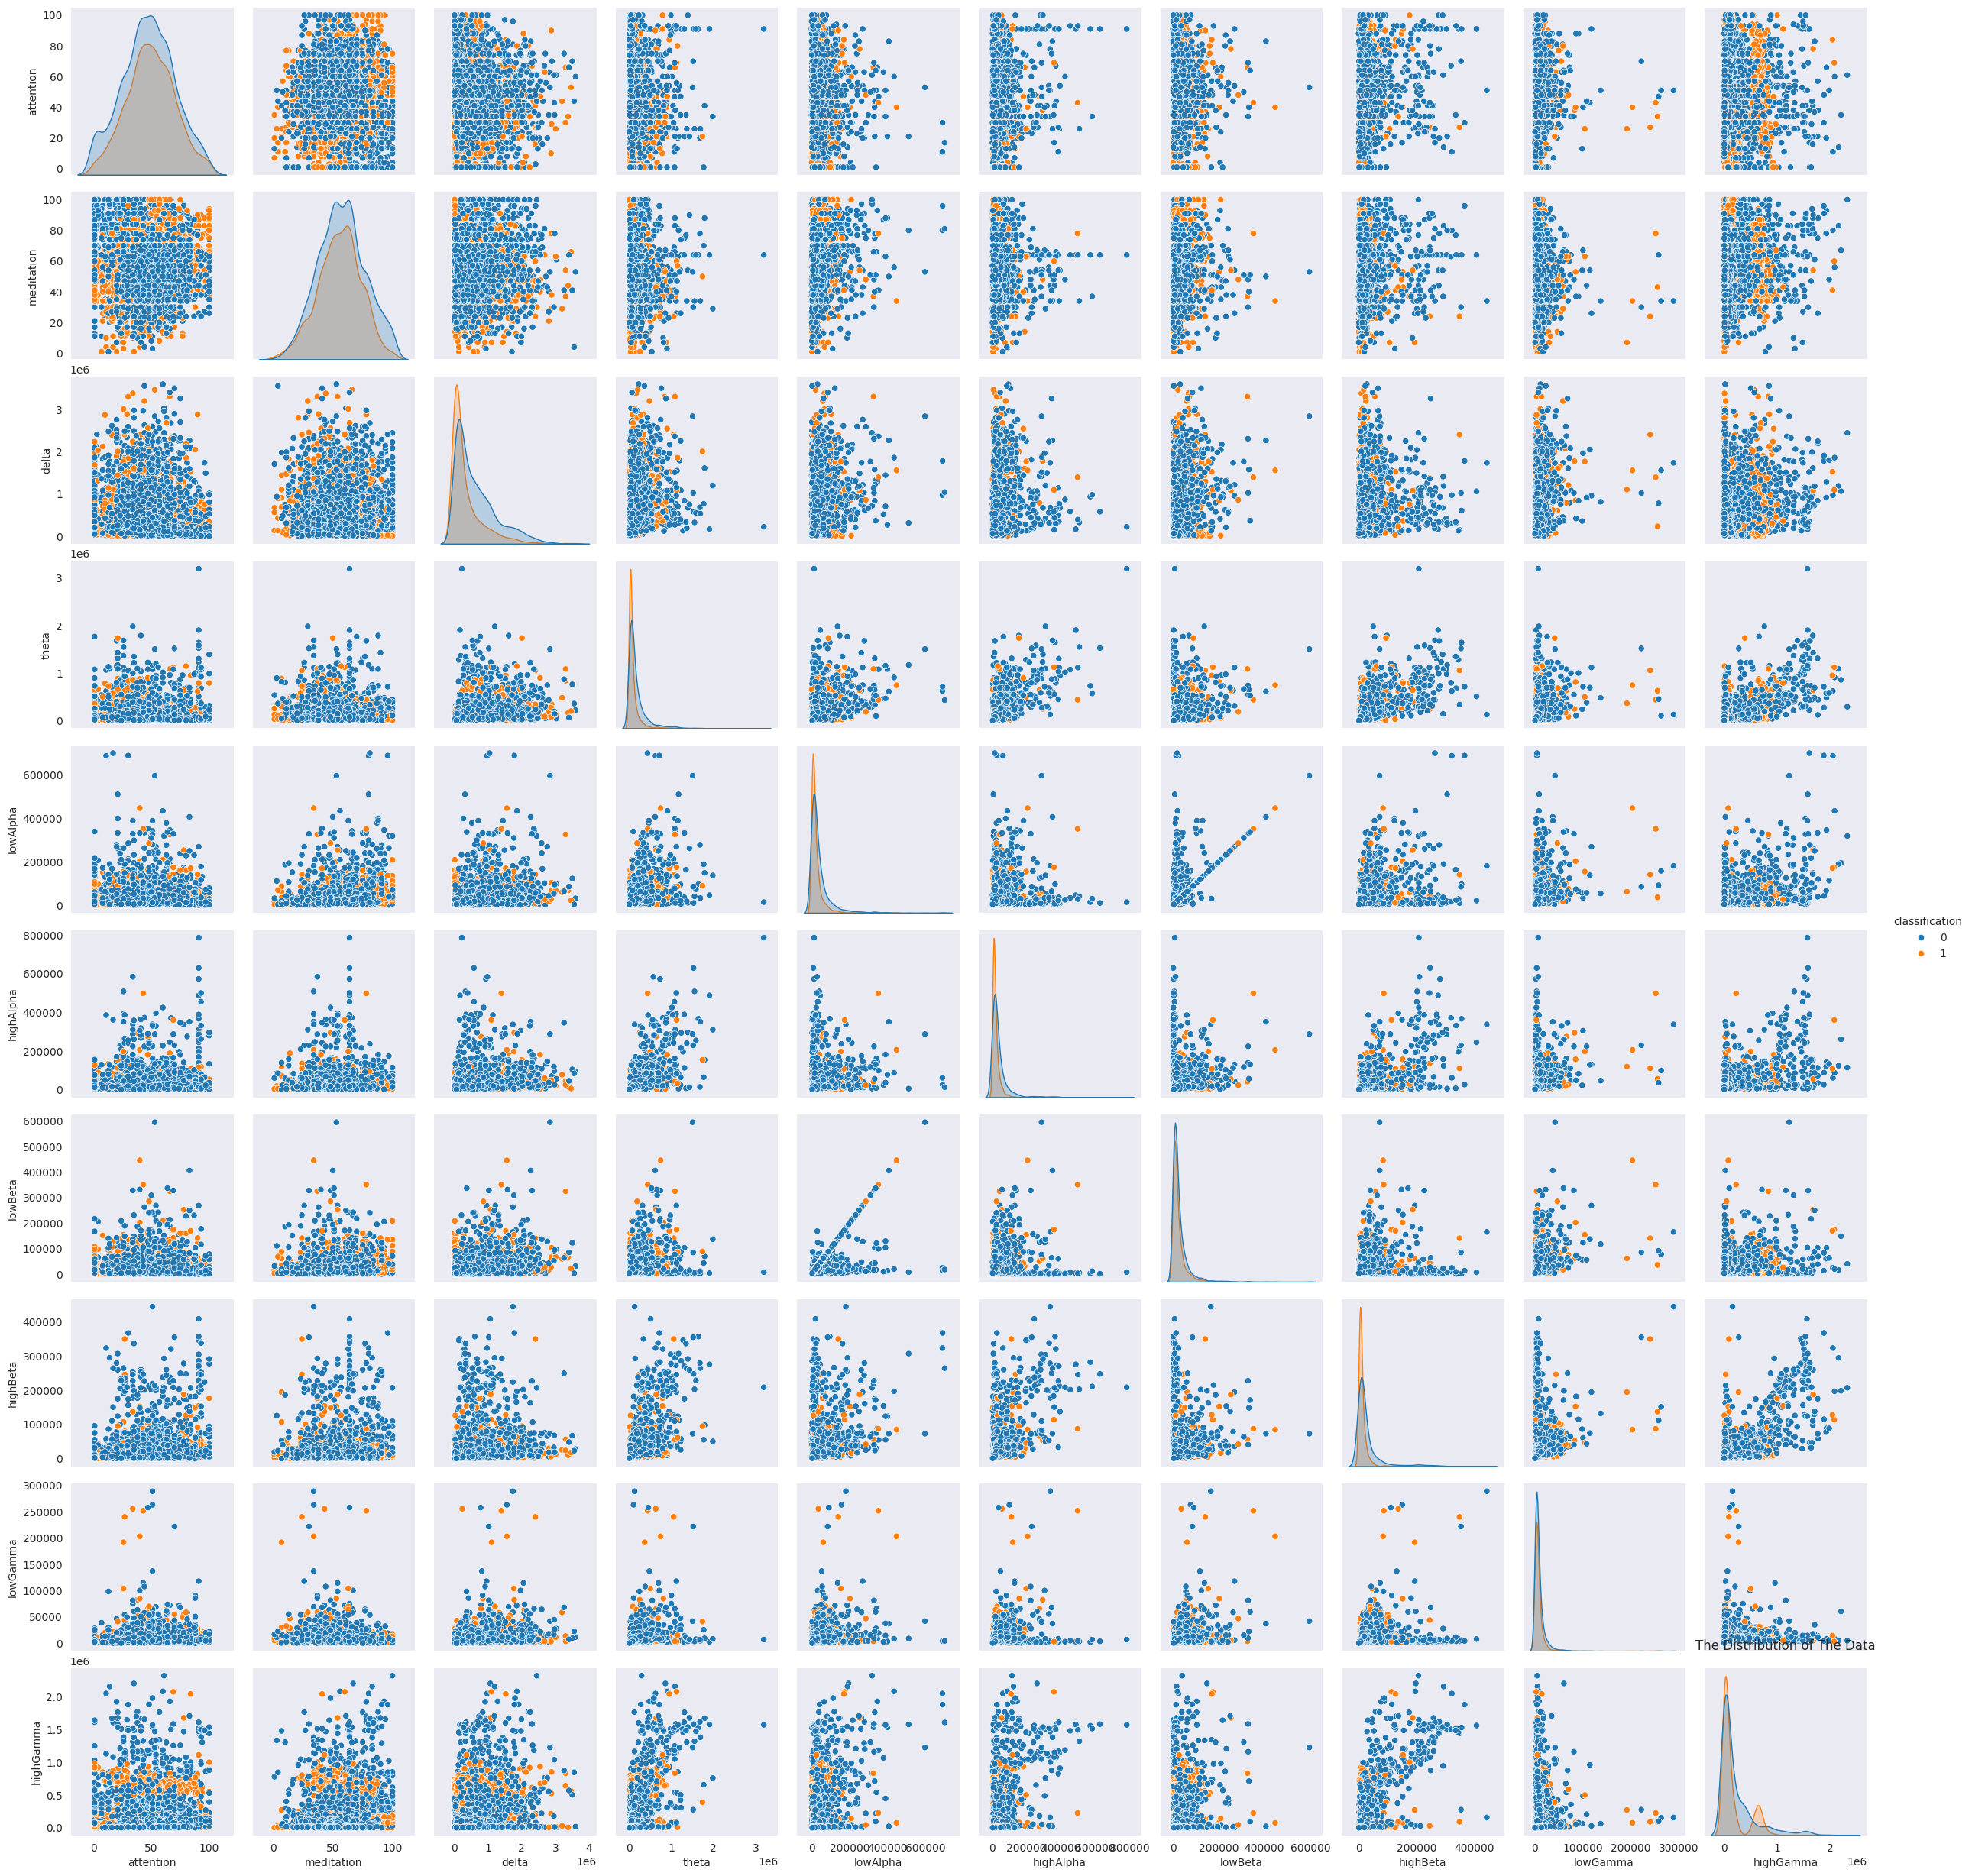

In [21]:
sns.pairplot(data=df , hue='classification')
plt.title("The Distribution of The Data")
plt.show()

In [22]:
df.columns

Index(['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha',
       'lowBeta', 'highBeta', 'lowGamma', 'highGamma', 'classification'],
      dtype='object')

## `Split Data Into Features and Target Sets`

In [23]:
Features = df.drop('classification' , axis=1)
Features.head()

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  
0     13056      9126       2683  
1      9933      5237       4750  
2     11663      2515       3251  
3     27663     11396       2825  
4     16328      5298       5471

In [24]:
Target = df['classification']
Target.head()

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64

## `Split The Data Into Train And Test Sets`

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train , x_test , y_train , y_test = train_test_split(Features ,
                                                       Target ,
                                                       test_size=0.2 ,
                                                       shuffle=True ,
                                                       random_state=42)

In [27]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((2988, 10), (747, 10), (2988,), (747,))

## `Scaling The Data Set By Stander_Scale`
* To Avoid The Interupt With Outliers in The Data Set

In [28]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.fit_transform(x_test)

In [29]:
x_train.shape , x_test.shape

((2988, 10), (747, 10))

## `KNN Model Classification`

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
np.random.seed(42)

In [34]:
Knn = KNeighborsClassifier().fit(x_train_scaled , y_train)

In [35]:
Score = Knn.score(x_test_scaled ,y_test)
Score

0.6987951807228916

## `Tunning Parameters in knn calssification `

In [36]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer ,precision_score ,recall_score,f1_score,classification_report
precision = make_scorer(precision_score)
recall = make_scorer(recall_score)
f_1 = make_scorer(f1_score)
class_report = make_scorer(classification_report)
scoring = {"precision":precision ,
          "recall" : recall , 
          "f_1" :f_1 ,
          "class_report" : class_report}
grid = {"n_neighbors": [1,2,3,4,5,6,8,9,10],
        "weights": ['uniform', 'distance'],
        "p": [1, 2],
        "algorithm":  ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "leaf_size": [15, 20,30]}
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_jobs=-1)
Search_cv =RandomizedSearchCV(estimator=model
                             ,param_distributions=grid
                             ,n_iter=20
                             ,cv=5
                             ,verbose=2, 
                              scoring=scoring ,
                              refit=False ,
                              return_train_score=True)
Search_cv.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       340
           1       0.67      0.78      0.72       258

    accuracy                           0.74       598
   macro avg       0.74      0.75      0.74       598
weighted avg       0.75      0.74      0.74       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1357
           1       0.75      0.79      0.77      1033

    accuracy                           0.80      2390
   macro avg       0.79      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       340
           1       0.67      0.74      0.70       258

    accuracy                           0.73       598
   macro avg       0.73      0.73      0.73       598
weighted avg       0.74      0.73      0.73       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1357
           1       0.76      0.78      0.77      1033

    accuracy                           0.80      2390
   macro avg       0.79      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       339
           1       0.66      0.64      0.65       259

    accuracy                           0.70       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.70      0.70      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1358
           1       0.77      0.81      0.79      1032

    accuracy                           0.82      2390
   macro avg       0.81      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       339
           1       0.66      0.74      0.70       258

    accuracy                           0.73       597
   macro avg       0.72      0.73      0.72       597
weighted avg       0.73      0.73      0.73       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1358
           1       0.75      0.79      0.77      1033

    accuracy                           0.79      2391
   macro avg       0.79      0.7

[CV] END algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       339
           1       0.66      0.71      0.69       258

    accuracy                           0.72       597
   macro avg       0.71      0.72      0.71       597
weighted avg       0.72      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1358
           1       0.75      0.79      0.77      1033

    accuracy                           0.80      2391
   macro avg       0.79      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       340
           1       0.60      0.67      0.63       258

    accuracy                           0.66       598
   macro avg       0.66      0.67      0.66       598
weighted avg       0.67      0.66      0.67       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       340
           1       0.64      0.71      0.68       258

    accuracy                           0.70       598
   macro avg       0.70      0.71      0.70       598
weighted avg       0.71      0.70      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       339
           1       0.60      0.59      0.59       259

    accuracy                           0.65       598
   macro avg       0.64      0.64      0.64       598
weighted avg       0.65      0.65      0.65       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       339
           1       0.62      0.67      0.64       258

    accuracy                           0.68       597
   macro avg       0.68      0.68      0.68       597
weighted avg       0.68      0.68      0.68       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       339
           1       0.65      0.66      0.65       258

    accuracy                           0.70       597
   macro avg       0.69      0.69      0.69       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       340
           1       0.58      0.68      0.63       258

    accuracy                           0.65       598
   macro avg       0.65      0.65      0.65       598
weighted avg       0.66      0.65      0.65       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.2s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       340
           1       0.64      0.72      0.68       258

    accuracy                           0.71       598
   macro avg       0.71      0.71      0.71       598
weighted avg       0.72      0.71      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       339
           1       0.61      0.58      0.59       259

    accuracy                           0.66       598
   macro avg       0.65      0.65      0.65       598
weighted avg       0.65      0.66      0.65       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       339
           1       0.64      0.69      0.66       258

    accuracy                           0.70       597
   macro avg       0.69      0.70      0.70       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.2s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       339
           1       0.64      0.70      0.67       258

    accuracy                           0.70       597
   macro avg       0.70      0.70      0.70       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       340
           1       0.66      0.75      0.70       258

    accuracy                           0.73       598
   macro avg       0.72      0.73      0.72       598
weighted avg       0.73      0.73      0.73       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1357
           1       0.75      0.76      0.75      1033

    accuracy                           0.79      2390
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=15, n_neighbors=9, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       340
           1       0.67      0.70      0.68       258

    accuracy                           0.72       598
   macro avg       0.72      0.72      0.72       598
weighted avg       0.72      0.72      0.72       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1357
           1       0.73      0.76      0.74      1033

    accuracy                           0.78      2390
   macro avg       0.77      0.7

[CV] END algorithm=auto, leaf_size=15, n_neighbors=9, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       339
           1       0.67      0.63      0.65       259

    accuracy                           0.71       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.71      0.71      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1358
           1       0.74      0.77      0.75      1032

    accuracy                           0.78      2390
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=15, n_neighbors=9, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       339
           1       0.64      0.68      0.66       258

    accuracy                           0.70       597
   macro avg       0.69      0.69      0.69       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1358
           1       0.74      0.77      0.76      1033

    accuracy                           0.79      2391
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=15, n_neighbors=9, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       339
           1       0.64      0.69      0.66       258

    accuracy                           0.70       597
   macro avg       0.69      0.70      0.70       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1358
           1       0.74      0.77      0.76      1033

    accuracy                           0.79      2391
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=15, n_neighbors=9, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       340
           1       0.70      0.72      0.71       258

    accuracy                           0.75       598
   macro avg       0.74      0.74      0.74       598
weighted avg       0.75      0.75      0.75       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1357
           1       0.79      0.73      0.76      1033

    accuracy                           0.80      2390
   macro avg       0.80      0.7

[CV] END algorithm=brute, leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       340
           1       0.72      0.67      0.70       258

    accuracy                           0.75       598
   macro avg       0.74      0.74      0.74       598
weighted avg       0.74      0.75      0.74       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1357
           1       0.80      0.72      0.76      1033

    accuracy                           0.80      2390
   macro avg       0.80      0.7

[CV] END algorithm=brute, leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       339
           1       0.72      0.59      0.65       259

    accuracy                           0.73       598
   macro avg       0.73      0.71      0.71       598
weighted avg       0.73      0.73      0.72       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1358
           1       0.81      0.77      0.79      1032

    accuracy                           0.82      2390
   macro avg       0.82      0.8

[CV] END algorithm=brute, leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       339
           1       0.71      0.69      0.70       258

    accuracy                           0.74       597
   macro avg       0.74      0.74      0.74       597
weighted avg       0.74      0.74      0.74       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1358
           1       0.78      0.73      0.75      1033

    accuracy                           0.79      2391
   macro avg       0.79      0.7

[CV] END algorithm=brute, leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       339
           1       0.69      0.63      0.66       258

    accuracy                           0.72       597
   macro avg       0.71      0.71      0.71       597
weighted avg       0.72      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1358
           1       0.78      0.74      0.76      1033

    accuracy                           0.80      2391
   macro avg       0.80      0.7

[CV] END algorithm=brute, leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       340
           1       0.64      0.72      0.68       258

    accuracy                           0.70       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.71      0.70      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       340
           1       0.66      0.71      0.69       258

    accuracy                           0.72       598
   macro avg       0.71      0.72      0.71       598
weighted avg       0.72      0.72      0.72       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       339
           1       0.68      0.64      0.66       259

    accuracy                           0.71       598
   macro avg       0.71      0.70      0.71       598
weighted avg       0.71      0.71      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       339
           1       0.64      0.66      0.65       258

    accuracy                           0.70       597
   macro avg       0.69      0.69      0.69       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       339
           1       0.66      0.66      0.66       258

    accuracy                           0.71       597
   macro avg       0.70      0.70      0.70       597
weighted avg       0.71      0.71      0.71       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       340
           1       0.63      0.72      0.67       258

    accuracy                           0.69       598
   macro avg       0.69      0.70      0.69       598
weighted avg       0.70      0.69      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1357
           1       0.78      0.79      0.79      1033

    accuracy                           0.81      2390
   macro avg       0.81      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       340
           1       0.65      0.71      0.68       258

    accuracy                           0.71       598
   macro avg       0.71      0.71      0.71       598
weighted avg       0.72      0.71      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1357
           1       0.78      0.79      0.78      1033

    accuracy                           0.81      2390
   macro avg       0.81      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       339
           1       0.67      0.64      0.65       259

    accuracy                           0.71       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.70      0.71      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1358
           1       0.78      0.81      0.79      1032

    accuracy                           0.82      2390
   macro avg       0.81      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       339
           1       0.63      0.65      0.64       258

    accuracy                           0.69       597
   macro avg       0.68      0.68      0.68       597
weighted avg       0.69      0.69      0.69       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1358
           1       0.78      0.79      0.78      1033

    accuracy                           0.81      2391
   macro avg       0.81      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       339
           1       0.66      0.66      0.66       258

    accuracy                           0.70       597
   macro avg       0.70      0.70      0.70       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1358
           1       0.77      0.80      0.78      1033

    accuracy                           0.81      2391
   macro avg       0.81      0.8

[CV] END algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       340
           1       0.63      0.71      0.66       258

    accuracy                           0.69       598
   macro avg       0.69      0.69      0.69       598
weighted avg       0.70      0.69      0.69       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1357
           1       0.82      0.83      0.83      1033

    accuracy                           0.85      2390
   macro avg       0.85      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       340
           1       0.68      0.72      0.70       258

    accuracy                           0.73       598
   macro avg       0.73      0.73      0.73       598
weighted avg       0.73      0.73      0.73       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1357
           1       0.82      0.82      0.82      1033

    accuracy                           0.84      2390
   macro avg       0.84      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       339
           1       0.65      0.61      0.63       259

    accuracy                           0.69       598
   macro avg       0.68      0.68      0.68       598
weighted avg       0.69      0.69      0.69       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1358
           1       0.82      0.85      0.83      1032

    accuracy                           0.85      2390
   macro avg       0.85      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       339
           1       0.63      0.67      0.65       258

    accuracy                           0.68       597
   macro avg       0.68      0.68      0.68       597
weighted avg       0.69      0.68      0.68       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1358
           1       0.81      0.85      0.83      1033

    accuracy                           0.85      2391
   macro avg       0.85      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=2, weights=uniform; total time=   0.2s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       339
           1       0.68      0.67      0.67       258

    accuracy                           0.72       597
   macro avg       0.71      0.71      0.71       597
weighted avg       0.72      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1358
           1       0.81      0.84      0.83      1033

    accuracy                           0.85      2391
   macro avg       0.84      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       340
           1       0.63      0.71      0.67       258

    accuracy                           0.69       598
   macro avg       0.69      0.70      0.69       598
weighted avg       0.70      0.69      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       340
           1       0.68      0.71      0.69       258

    accuracy                           0.73       598
   macro avg       0.72      0.73      0.73       598
weighted avg       0.73      0.73      0.73       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       339
           1       0.66      0.61      0.63       259

    accuracy                           0.70       598
   macro avg       0.69      0.69      0.69       598
weighted avg       0.69      0.70      0.69       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       339
           1       0.62      0.67      0.65       258

    accuracy                           0.68       597
   macro avg       0.68      0.68      0.68       597
weighted avg       0.69      0.68      0.68       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       339
           1       0.67      0.66      0.66       258

    accuracy                           0.71       597
   macro avg       0.71      0.71      0.71       597
weighted avg       0.71      0.71      0.71       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       340
           1       0.68      0.51      0.59       258

    accuracy                           0.69       598
   macro avg       0.69      0.67      0.67       598
weighted avg       0.69      0.69      0.68       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1357
           1       1.00      0.68      0.81      1033

    accuracy                           0.86      2390
   macro avg       0.90      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=1, weights=uniform; total time=   0.2s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       340
           1       0.75      0.55      0.63       258

    accuracy                           0.73       598
   macro avg       0.73      0.70      0.71       598
weighted avg       0.73      0.73      0.72       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1357
           1       1.00      0.66      0.80      1033

    accuracy                           0.85      2390
   macro avg       0.90      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       339
           1       0.71      0.42      0.53       259

    accuracy                           0.68       598
   macro avg       0.69      0.65      0.64       598
weighted avg       0.68      0.68      0.66       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1358
           1       1.00      0.69      0.82      1032

    accuracy                           0.87      2390
   macro avg       0.90      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.71      0.86      0.77       339
           1       0.74      0.53      0.62       258

    accuracy                           0.72       597
   macro avg       0.72      0.69      0.70       597
weighted avg       0.72      0.72      0.71       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1358
           1       1.00      0.69      0.81      1033

    accuracy                           0.86      2391
   macro avg       0.90      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       339
           1       0.75      0.50      0.60       258

    accuracy                           0.71       597
   macro avg       0.72      0.69      0.69       597
weighted avg       0.72      0.71      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1358
           1       1.00      0.68      0.81      1033

    accuracy                           0.86      2391
   macro avg       0.90      0.8

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       340
           1       0.63      0.73      0.68       258

    accuracy                           0.70       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.71      0.70      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       340
           1       0.67      0.74      0.71       258

    accuracy                           0.73       598
   macro avg       0.73      0.73      0.73       598
weighted avg       0.74      0.73      0.74       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       339
           1       0.64      0.62      0.63       259

    accuracy                           0.68       598
   macro avg       0.68      0.68      0.68       598
weighted avg       0.68      0.68      0.68       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       339
           1       0.67      0.73      0.70       258

    accuracy                           0.73       597
   macro avg       0.73      0.73      0.73       597
weighted avg       0.73      0.73      0.73       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       339
           1       0.66      0.72      0.69       258

    accuracy                           0.72       597
   macro avg       0.72      0.72      0.72       597
weighted avg       0.72      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       340
           1       0.67      0.67      0.67       258

    accuracy                           0.72       598
   macro avg       0.71      0.71      0.71       598
weighted avg       0.72      0.72      0.72       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1357
           1       0.78      0.71      0.74      1033

    accuracy                           0.79      2390
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=20, n_neighbors=10, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       340
           1       0.71      0.61      0.66       258

    accuracy                           0.72       598
   macro avg       0.72      0.71      0.71       598
weighted avg       0.72      0.72      0.72       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1357
           1       0.77      0.70      0.73      1033

    accuracy                           0.78      2390
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=20, n_neighbors=10, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       339
           1       0.70      0.58      0.63       259

    accuracy                           0.71       598
   macro avg       0.71      0.69      0.70       598
weighted avg       0.71      0.71      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1358
           1       0.77      0.70      0.74      1032

    accuracy                           0.78      2390
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=20, n_neighbors=10, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       339
           1       0.67      0.60      0.64       258

    accuracy                           0.70       597
   macro avg       0.69      0.69      0.69       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1358
           1       0.78      0.69      0.73      1033

    accuracy                           0.78      2391
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=20, n_neighbors=10, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       339
           1       0.67      0.63      0.65       258

    accuracy                           0.70       597
   macro avg       0.70      0.69      0.70       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1358
           1       0.77      0.70      0.73      1033

    accuracy                           0.78      2391
   macro avg       0.78      0.7

[CV] END algorithm=auto, leaf_size=20, n_neighbors=10, p=2, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       340
           1       0.62      0.72      0.67       258

    accuracy                           0.69       598
   macro avg       0.69      0.70      0.69       598
weighted avg       0.70      0.69      0.69       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       340
           1       0.65      0.72      0.69       258

    accuracy                           0.71       598
   macro avg       0.71      0.71      0.71       598
weighted avg       0.72      0.71      0.72       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       339
           1       0.67      0.64      0.65       259

    accuracy                           0.71       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.71      0.71      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       339
           1       0.63      0.65      0.64       258

    accuracy                           0.68       597
   macro avg       0.68      0.68      0.68       597
weighted avg       0.68      0.68      0.68       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       339
           1       0.66      0.66      0.66       258

    accuracy                           0.71       597
   macro avg       0.70      0.70      0.70       597
weighted avg       0.71      0.71      0.71       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       340
           1       0.63      0.71      0.66       258

    accuracy                           0.69       598
   macro avg       0.69      0.69      0.69       598
weighted avg       0.70      0.69      0.69       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1357
           1       0.82      0.83      0.83      1033

    accuracy                           0.85      2390
   macro avg       0.85      0.8

[CV] END algorithm=brute, leaf_size=15, n_neighbors=3, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       340
           1       0.68      0.72      0.70       258

    accuracy                           0.73       598
   macro avg       0.73      0.73      0.73       598
weighted avg       0.73      0.73      0.73       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1357
           1       0.82      0.82      0.82      1033

    accuracy                           0.84      2390
   macro avg       0.84      0.8

[CV] END algorithm=brute, leaf_size=15, n_neighbors=3, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       339
           1       0.65      0.61      0.63       259

    accuracy                           0.69       598
   macro avg       0.68      0.68      0.68       598
weighted avg       0.69      0.69      0.69       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1358
           1       0.82      0.85      0.83      1032

    accuracy                           0.85      2390
   macro avg       0.85      0.8

[CV] END algorithm=brute, leaf_size=15, n_neighbors=3, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       339
           1       0.63      0.67      0.65       258

    accuracy                           0.68       597
   macro avg       0.68      0.68      0.68       597
weighted avg       0.69      0.68      0.68       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1358
           1       0.81      0.85      0.83      1033

    accuracy                           0.85      2391
   macro avg       0.85      0.8

[CV] END algorithm=brute, leaf_size=15, n_neighbors=3, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       339
           1       0.68      0.67      0.67       258

    accuracy                           0.72       597
   macro avg       0.71      0.71      0.71       597
weighted avg       0.72      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1358
           1       0.81      0.84      0.83      1033

    accuracy                           0.85      2391
   macro avg       0.84      0.8

[CV] END algorithm=brute, leaf_size=15, n_neighbors=3, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       340
           1       0.60      0.67      0.63       258

    accuracy                           0.66       598
   macro avg       0.66      0.67      0.66       598
weighted avg       0.67      0.66      0.67       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=20, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       340
           1       0.64      0.71      0.68       258

    accuracy                           0.70       598
   macro avg       0.70      0.71      0.70       598
weighted avg       0.71      0.70      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=20, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       339
           1       0.60      0.59      0.59       259

    accuracy                           0.65       598
   macro avg       0.64      0.64      0.64       598
weighted avg       0.65      0.65      0.65       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=20, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       339
           1       0.62      0.67      0.64       258

    accuracy                           0.68       597
   macro avg       0.68      0.68      0.68       597
weighted avg       0.68      0.68      0.68       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=20, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       339
           1       0.65      0.66      0.65       258

    accuracy                           0.70       597
   macro avg       0.69      0.69      0.69       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=20, n_neighbors=1, p=2, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       340
           1       0.68      0.78      0.73       258

    accuracy                           0.74       598
   macro avg       0.74      0.75      0.74       598
weighted avg       0.75      0.74      0.75       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       340
           1       0.67      0.75      0.71       258

    accuracy                           0.74       598
   macro avg       0.73      0.74      0.73       598
weighted avg       0.74      0.74      0.74       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       339
           1       0.66      0.64      0.65       259

    accuracy                           0.70       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.70      0.70      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       339
           1       0.66      0.74      0.70       258

    accuracy                           0.72       597
   macro avg       0.72      0.72      0.72       597
weighted avg       0.73      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       339
           1       0.66      0.71      0.69       258

    accuracy                           0.72       597
   macro avg       0.71      0.72      0.72       597
weighted avg       0.72      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       340
           1       0.68      0.62      0.65       258

    accuracy                           0.71       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.71      0.71      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1357
           1       0.83      0.68      0.75      1033

    accuracy                           0.80      2390
   macro avg       0.81      0.7

[CV] END algorithm=brute, leaf_size=20, n_neighbors=6, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       340
           1       0.70      0.62      0.66       258

    accuracy                           0.72       598
   macro avg       0.72      0.71      0.71       598
weighted avg       0.72      0.72      0.72       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1357
           1       0.83      0.68      0.75      1033

    accuracy                           0.80      2390
   macro avg       0.81      0.7

[CV] END algorithm=brute, leaf_size=20, n_neighbors=6, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       339
           1       0.73      0.56      0.63       259

    accuracy                           0.72       598
   macro avg       0.72      0.70      0.70       598
weighted avg       0.72      0.72      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1358
           1       0.83      0.70      0.76      1032

    accuracy                           0.81      2390
   macro avg       0.81      0.8

[CV] END algorithm=brute, leaf_size=20, n_neighbors=6, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.80      0.75       339
           1       0.69      0.59      0.63       258

    accuracy                           0.71       597
   macro avg       0.70      0.69      0.69       597
weighted avg       0.70      0.71      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1358
           1       0.83      0.69      0.75      1033

    accuracy                           0.80      2391
   macro avg       0.81      0.7

[CV] END algorithm=brute, leaf_size=20, n_neighbors=6, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       339
           1       0.69      0.55      0.61       258

    accuracy                           0.70       597
   macro avg       0.69      0.68      0.68       597
weighted avg       0.70      0.70      0.69       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1358
           1       0.82      0.68      0.74      1033

    accuracy                           0.79      2391
   macro avg       0.80      0.7

[CV] END algorithm=brute, leaf_size=20, n_neighbors=6, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       340
           1       0.58      0.68      0.63       258

    accuracy                           0.65       598
   macro avg       0.65      0.65      0.65       598
weighted avg       0.66      0.65      0.65       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       340
           1       0.64      0.72      0.68       258

    accuracy                           0.71       598
   macro avg       0.71      0.71      0.71       598
weighted avg       0.72      0.71      0.71       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       339
           1       0.61      0.58      0.59       259

    accuracy                           0.66       598
   macro avg       0.65      0.65      0.65       598
weighted avg       0.65      0.66      0.65       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.3s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       339
           1       0.64      0.69      0.66       258

    accuracy                           0.70       597
   macro avg       0.69      0.70      0.70       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       339
           1       0.64      0.70      0.67       258

    accuracy                           0.70       597
   macro avg       0.70      0.70      0.70       597
weighted avg       0.70      0.70      0.70       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=1, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       340
           1       0.63      0.73      0.68       258

    accuracy                           0.70       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.71      0.70      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=15, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       340
           1       0.67      0.74      0.71       258

    accuracy                           0.73       598
   macro avg       0.73      0.73      0.73       598
weighted avg       0.74      0.73      0.74       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=15, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       339
           1       0.64      0.62      0.63       259

    accuracy                           0.68       598
   macro avg       0.68      0.68      0.68       598
weighted avg       0.68      0.68      0.68       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2390
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=15, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       339
           1       0.67      0.73      0.70       258

    accuracy                           0.73       597
   macro avg       0.73      0.73      0.73       597
weighted avg       0.73      0.73      0.73       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=15, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       339
           1       0.66      0.72      0.69       258

    accuracy                           0.72       597
   macro avg       0.72      0.72      0.72       597
weighted avg       0.72      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1358
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2391
   macro avg       1.00      1.0

[CV] END algorithm=auto, leaf_size=15, n_neighbors=3, p=1, weights=distance; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       340
           1       0.67      0.78      0.72       258

    accuracy                           0.74       598
   macro avg       0.74      0.75      0.74       598
weighted avg       0.75      0.74      0.74       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1357
           1       0.75      0.79      0.77      1033

    accuracy                           0.80      2390
   macro avg       0.79      0.8

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       340
           1       0.67      0.74      0.70       258

    accuracy                           0.73       598
   macro avg       0.73      0.73      0.73       598
weighted avg       0.74      0.73      0.73       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1357
           1       0.76      0.78      0.77      1033

    accuracy                           0.80      2390
   macro avg       0.79      0.8

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=1, weights=uniform; total time=   0.1s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       339
           1       0.66      0.64      0.65       259

    accuracy                           0.70       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.70      0.70      0.70       598

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1358
           1       0.77      0.81      0.79      1032

    accuracy                           0.82      2390
   macro avg       0.81      0.8

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=1, weights=uniform; total time=   0.2s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       339
           1       0.66      0.74      0.70       258

    accuracy                           0.73       597
   macro avg       0.72      0.73      0.72       597
weighted avg       0.73      0.73      0.73       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1358
           1       0.75      0.79      0.77      1033

    accuracy                           0.79      2391
   macro avg       0.79      0.7

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=1, weights=uniform; total time=   0.2s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       339
           1       0.66      0.71      0.69       258

    accuracy                           0.72       597
   macro avg       0.71      0.72      0.71       597
weighted avg       0.72      0.72      0.72       597

  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1358
           1       0.75      0.79      0.77      1033

    accuracy                           0.80      2391
   macro avg       0.79      0.8

[CV] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=1, weights=uniform; total time=   0.2s


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [15, 20, 30],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 8, 9,
                                                        10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   refit=False, return_train_score=True,
                   scoring={'class_report': make_scorer(classification_report, response_method='predict'),
                            'f_1': make_scorer(f1_score, response_method='predict'),
                            'precision': make_scorer(precision_score, response_method='predict'),
                            'recall': make_scorer(recall_score, response_method='predict')},
                   verbose=2)